# EDA

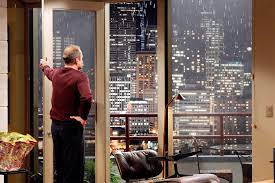

After having a phone call with Amy she let me know she wants to sell her houses in central Seattle in the next months. Of course she wants to make profit out of her sales but she made clear to get rid of the houses and not wait for better prices. Her real estates are all in the top 10% by grade of the official King County grading system and by condition. 
Besides selling her real estates she wants to invest in some average outskirt houses in the next months also. By average she made clear to focus on number of bedrooms and size of the living room.

Q:  Do grade and condition effect the prices of a real estates?
H:  The higher the higher

Q:  Does the volume of sales peak during a year?
H:  More houses are sold in summer

Q:  Can money be saved when reducing the numbers of bed- and / or bathrooms?
H:  The less the more

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.express as px


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('data/King_County_House_prices_dataset.csv')

In [162]:
df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221900.000         3      1.000         1180   
1  6414100192 2014-12-09 538000.000         3      2.250         2570   
2  5631500400 2015-02-25 180000.000         2      1.000          770   
3  2487200875 2014-12-09 604000.000         4      3.000         1960   
4  1954400510 2015-02-18 510000.000         3      2.000         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0      5650   1.000         NaN 0.000  ...            0.0      1955   
1      7242   2.000       0.000 0.000  ...          400.0      1951   
2     10000   1.000       0.000 0.000  ...            0.0      1933   
3      5000   1.000       0.000 0.000  ...          910.0      1965   
4      8080   1.000       0.000 0.000  ...            0.0      1987   

   yr_renovated zipcode    lat     long  sqft_living15  sqft_lot15  year  \
0         0.000   98178 47.511 -122.257           1340        5650  2014   
1      1991.000   98125 47.721 -122.319           1690        7639  2014   
2           NaN   98028 47.738 -122.233           2720        8062  2015   
3         0.000   98136 47.521 -122.393           1360        5000  2014   
4         0.000   98074 47.617 -122.045           1800        7503  2015   

   month  
0     10  
1     12  
2      2  
3     12  
4      2  

[5 rows x 23 columns]

In [163]:
df.tail()

id       date      price  bedrooms  bathrooms  sqft_living  \
21592   263000018 2014-05-21 360000.000         3      2.500         1530   
21593  6600060120 2015-02-23 400000.000         4      2.500         2310   
21594  1523300141 2014-06-23 402101.000         2      0.750         1020   
21595   291310100 2015-01-16 400000.000         3      2.500         1600   
21596  1523300157 2014-10-15 325000.000         2      0.750         1020   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
21592      1131   3.000       0.000 0.000  ...            0.0      2009   
21593      5813   2.000       0.000 0.000  ...            0.0      2014   
21594      1350   2.000       0.000 0.000  ...            0.0      2009   
21595      2388   2.000         NaN 0.000  ...            0.0      2004   
21596      1076   2.000       0.000 0.000  ...            0.0      2008   

       yr_renovated zipcode    lat     long  sqft_living15  sqft_lot15  year  \
21592         0.000   98103 47.699 -122.346           1530        1509  2014   
21593         0.000   98146 47.511 -122.362           1830        7200  2015   
21594         0.000   98144 47.594 -122.299           1020        2007  2014   
21595         0.000   98027 47.535 -122.069           1410        1287  2015   
21596         0.000   98144 47.594 -122.299           1020        1357  2014   

       month  
21592      5  
21593      2  
21594      6  
21595      1  
21596     10  

[5 rows x 23 columns]

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [4]:
df.shape

(21597, 21)

In [5]:
df.describe()

id       price  bedrooms  bathrooms  sqft_living  \
count      21597.000   21597.000 21597.000  21597.000    21597.000   
mean  4580474287.771  540296.574     3.373      2.116     2080.322   
std   2876735715.748  367368.140     0.926      0.769      918.106   
min      1000102.000   78000.000     1.000      0.500      370.000   
25%   2123049175.000  322000.000     3.000      1.750     1430.000   
50%   3904930410.000  450000.000     3.000      2.250     1910.000   
75%   7308900490.000  645000.000     4.000      2.500     2550.000   
max   9900000190.000 7700000.000    33.000      8.000    13540.000   

         sqft_lot    floors  waterfront      view  condition     grade  \
count   21597.000 21597.000   19221.000 21534.000  21597.000 21597.000   
mean    15099.409     1.494       0.008     0.234      3.410     7.658   
std     41412.637     0.540       0.087     0.766      0.651     1.173   
min       520.000     1.000       0.000     0.000      1.000     3.000   
25%      5040.000     1.000       0.000     0.000      3.000     7.000   
50%      7618.000     1.500       0.000     0.000      3.000     7.000   
75%     10685.000     2.000       0.000     0.000      4.000     8.000   
max   1651359.000     3.500       1.000     4.000      5.000    13.000   

       sqft_above  yr_built  yr_renovated   zipcode       lat      long  \
count   21597.000 21597.000     17755.000 21597.000 21597.000 21597.000   
mean     1788.597  1971.000        83.637 98077.952    47.560  -122.214   
std       827.760    29.375       399.946    53.513     0.139     0.141   
min       370.000  1900.000         0.000 98001.000    47.156  -122.519   
25%      1190.000  1951.000         0.000 98033.000    47.471  -122.328   
50%      1560.000  1975.000         0.000 98065.000    47.572  -122.231   
75%      2210.000  1997.000         0.000 98118.000    47.678  -122.125   
max      9410.000  2015.000      2015.000 98199.000    47.778  -121.315   

       sqft_living15  sqft_lot15  
count      21597.000   21597.000  
mean        1986.620   12758.284  
std          685.230   27274.442  
min          399.000     651.000  
25%         1490.000    5100.000  
50%         1840.000    7620.000  
75%         2360.000   10083.000  
max         6210.000  871200.000

In [169]:
#%%
#pd.plotting.scatter_matrix(df, figsize=(32,32))

CorrMatrix = df.corr()
CorrMatrix

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000 -0.017     0.001      0.005       -0.012    -0.132   
price         -0.017  1.000     0.309      0.526        0.702     0.090   
bedrooms       0.001  0.309     1.000      0.515        0.578     0.032   
bathrooms      0.005  0.526     0.515      1.000        0.756     0.088   
sqft_living   -0.012  0.702     0.578      0.756        1.000     0.173   
sqft_lot      -0.132  0.090     0.032      0.088        0.173     1.000   
floors         0.019  0.257     0.178      0.503        0.354    -0.005   
waterfront    -0.004  0.276    -0.002      0.067        0.110     0.023   
view           0.012  0.396     0.079      0.186        0.283     0.075   
condition     -0.024  0.036     0.026     -0.126       -0.059    -0.009   
grade          0.008  0.668     0.357      0.666        0.763     0.115   
sqft_above    -0.011  0.605     0.479      0.687        0.876     0.184   
yr_built       0.022  0.054     0.156      0.507        0.318     0.053   
yr_renovated  -0.012  0.130     0.018      0.051        0.056     0.005   
zipcode       -0.008 -0.053    -0.154     -0.205       -0.200    -0.130   
lat           -0.002  0.307    -0.010      0.024        0.052    -0.086   
long           0.021  0.022     0.132      0.225        0.241     0.230   
sqft_living15 -0.003  0.585     0.393      0.570        0.756     0.145   
sqft_lot15    -0.139  0.083     0.031      0.088        0.184     0.718   
year           0.010  0.004    -0.010     -0.027       -0.029     0.006   
month         -0.012 -0.010    -0.001      0.008        0.012    -0.003   

               floors  waterfront   view  condition  ...  sqft_above  \
id              0.019      -0.004  0.012     -0.024  ...      -0.011   
price           0.257       0.276  0.396      0.036  ...       0.605   
bedrooms        0.178      -0.002  0.079      0.026  ...       0.479   
bathrooms       0.503       0.067  0.186     -0.126  ...       0.687   
sqft_living     0.354       0.110  0.283     -0.059  ...       0.876   
sqft_lot       -0.005       0.023  0.075     -0.009  ...       0.184   
floors          1.000       0.022  0.028     -0.264  ...       0.524   
waterfront      0.022       1.000  0.407      0.018  ...       0.075   
view            0.028       0.407  1.000      0.046  ...       0.166   
condition      -0.264       0.018  0.046      1.000  ...      -0.159   
grade           0.459       0.087  0.250     -0.147  ...       0.756   
sqft_above      0.524       0.075  0.166     -0.159  ...       1.000   
yr_built        0.489      -0.026 -0.055     -0.362  ...       0.424   
yr_renovated    0.004       0.087  0.101     -0.062  ...       0.022   
zipcode        -0.060       0.031  0.085      0.003  ...      -0.262   
lat             0.049      -0.013  0.006     -0.015  ...      -0.001   
long            0.126      -0.040 -0.078     -0.106  ...       0.345   
sqft_living15   0.280       0.089  0.280     -0.093  ...       0.732   
sqft_lot15     -0.011       0.032  0.073     -0.003  ...       0.195   
year           -0.022      -0.005  0.002     -0.046  ...      -0.024   
month           0.014       0.008 -0.005      0.022  ...       0.010   

               yr_built  yr_renovated  zipcode    lat   long  sqft_living15  \
id                0.022        -0.012   -0.008 -0.002  0.021         -0.003   
price             0.054         0.130   -0.053  0.307  0.022          0.585   
bedrooms          0.156         0.018   -0.154 -0.010  0.132          0.393   
bathrooms         0.507         0.051   -0.205  0.024  0.225          0.570   
sqft_living       0.318         0.056   -0.200  0.052  0.241          0.756   
sqft_lot          0.053         0.005   -0.130 -0.086  0.230          0.145   
floors            0.489         0.004   -0.060  0.049  0.126          0.280   
waterfront       -0.026         0.087    0.031 -0.013 -0.040          0.089   
view             -0.055         0.101    0.085  0.006 -0.078          0

In [195]:
# Central area of Seattle -> ZIP 98122 https://www.usmapguide.com/washington/seattle-zip-code-map/
central_seattle = [98122, 98102, 98112]

df_central_estates = df[['zipcode', 'grade', 'condition', 'price']].query('zipcode == @central_seattle').groupby(['zipcode', 'grade', 'condition', 'price']).count().sort_values('price', ascending=False).reset_index()

In [196]:
df_loc = df[['lat', 'long']]
locations = px.density_mapbox(df_loc, lat="lat", lon ="long", mapbox_style ="stamen-terrain", zoom =9, radius=3,  width = 1000, height=600)
locations.show()

In [223]:
df_loc = df[['lat', 'long', 'zipcode']].query('zipcode == @central_seattle').reset_index()
locations = px.scatter_mapbox(df_loc, lat="lat", lon ="long", mapbox_style ="stamen-terrain", zoom =11.5,  width = 1000, height=600)
locations.show()

In [198]:
CorrMatrix = df_central_estates.corr()
CorrMatrix

zipcode  grade  condition  price
zipcode      1.000 -0.229     -0.069 -0.253
grade       -0.229  1.000      0.204  0.713
condition   -0.069  0.204      1.000  0.306
price       -0.253  0.713      0.306  1.000

In [199]:
plt.rcParams['figure.figsize']=(15,7.5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='whitegrid')
sns.set_context('poster', font_scale=0.85)

Text(0, 5.5, '*Zipcodes: 98122, 98102, 98112')

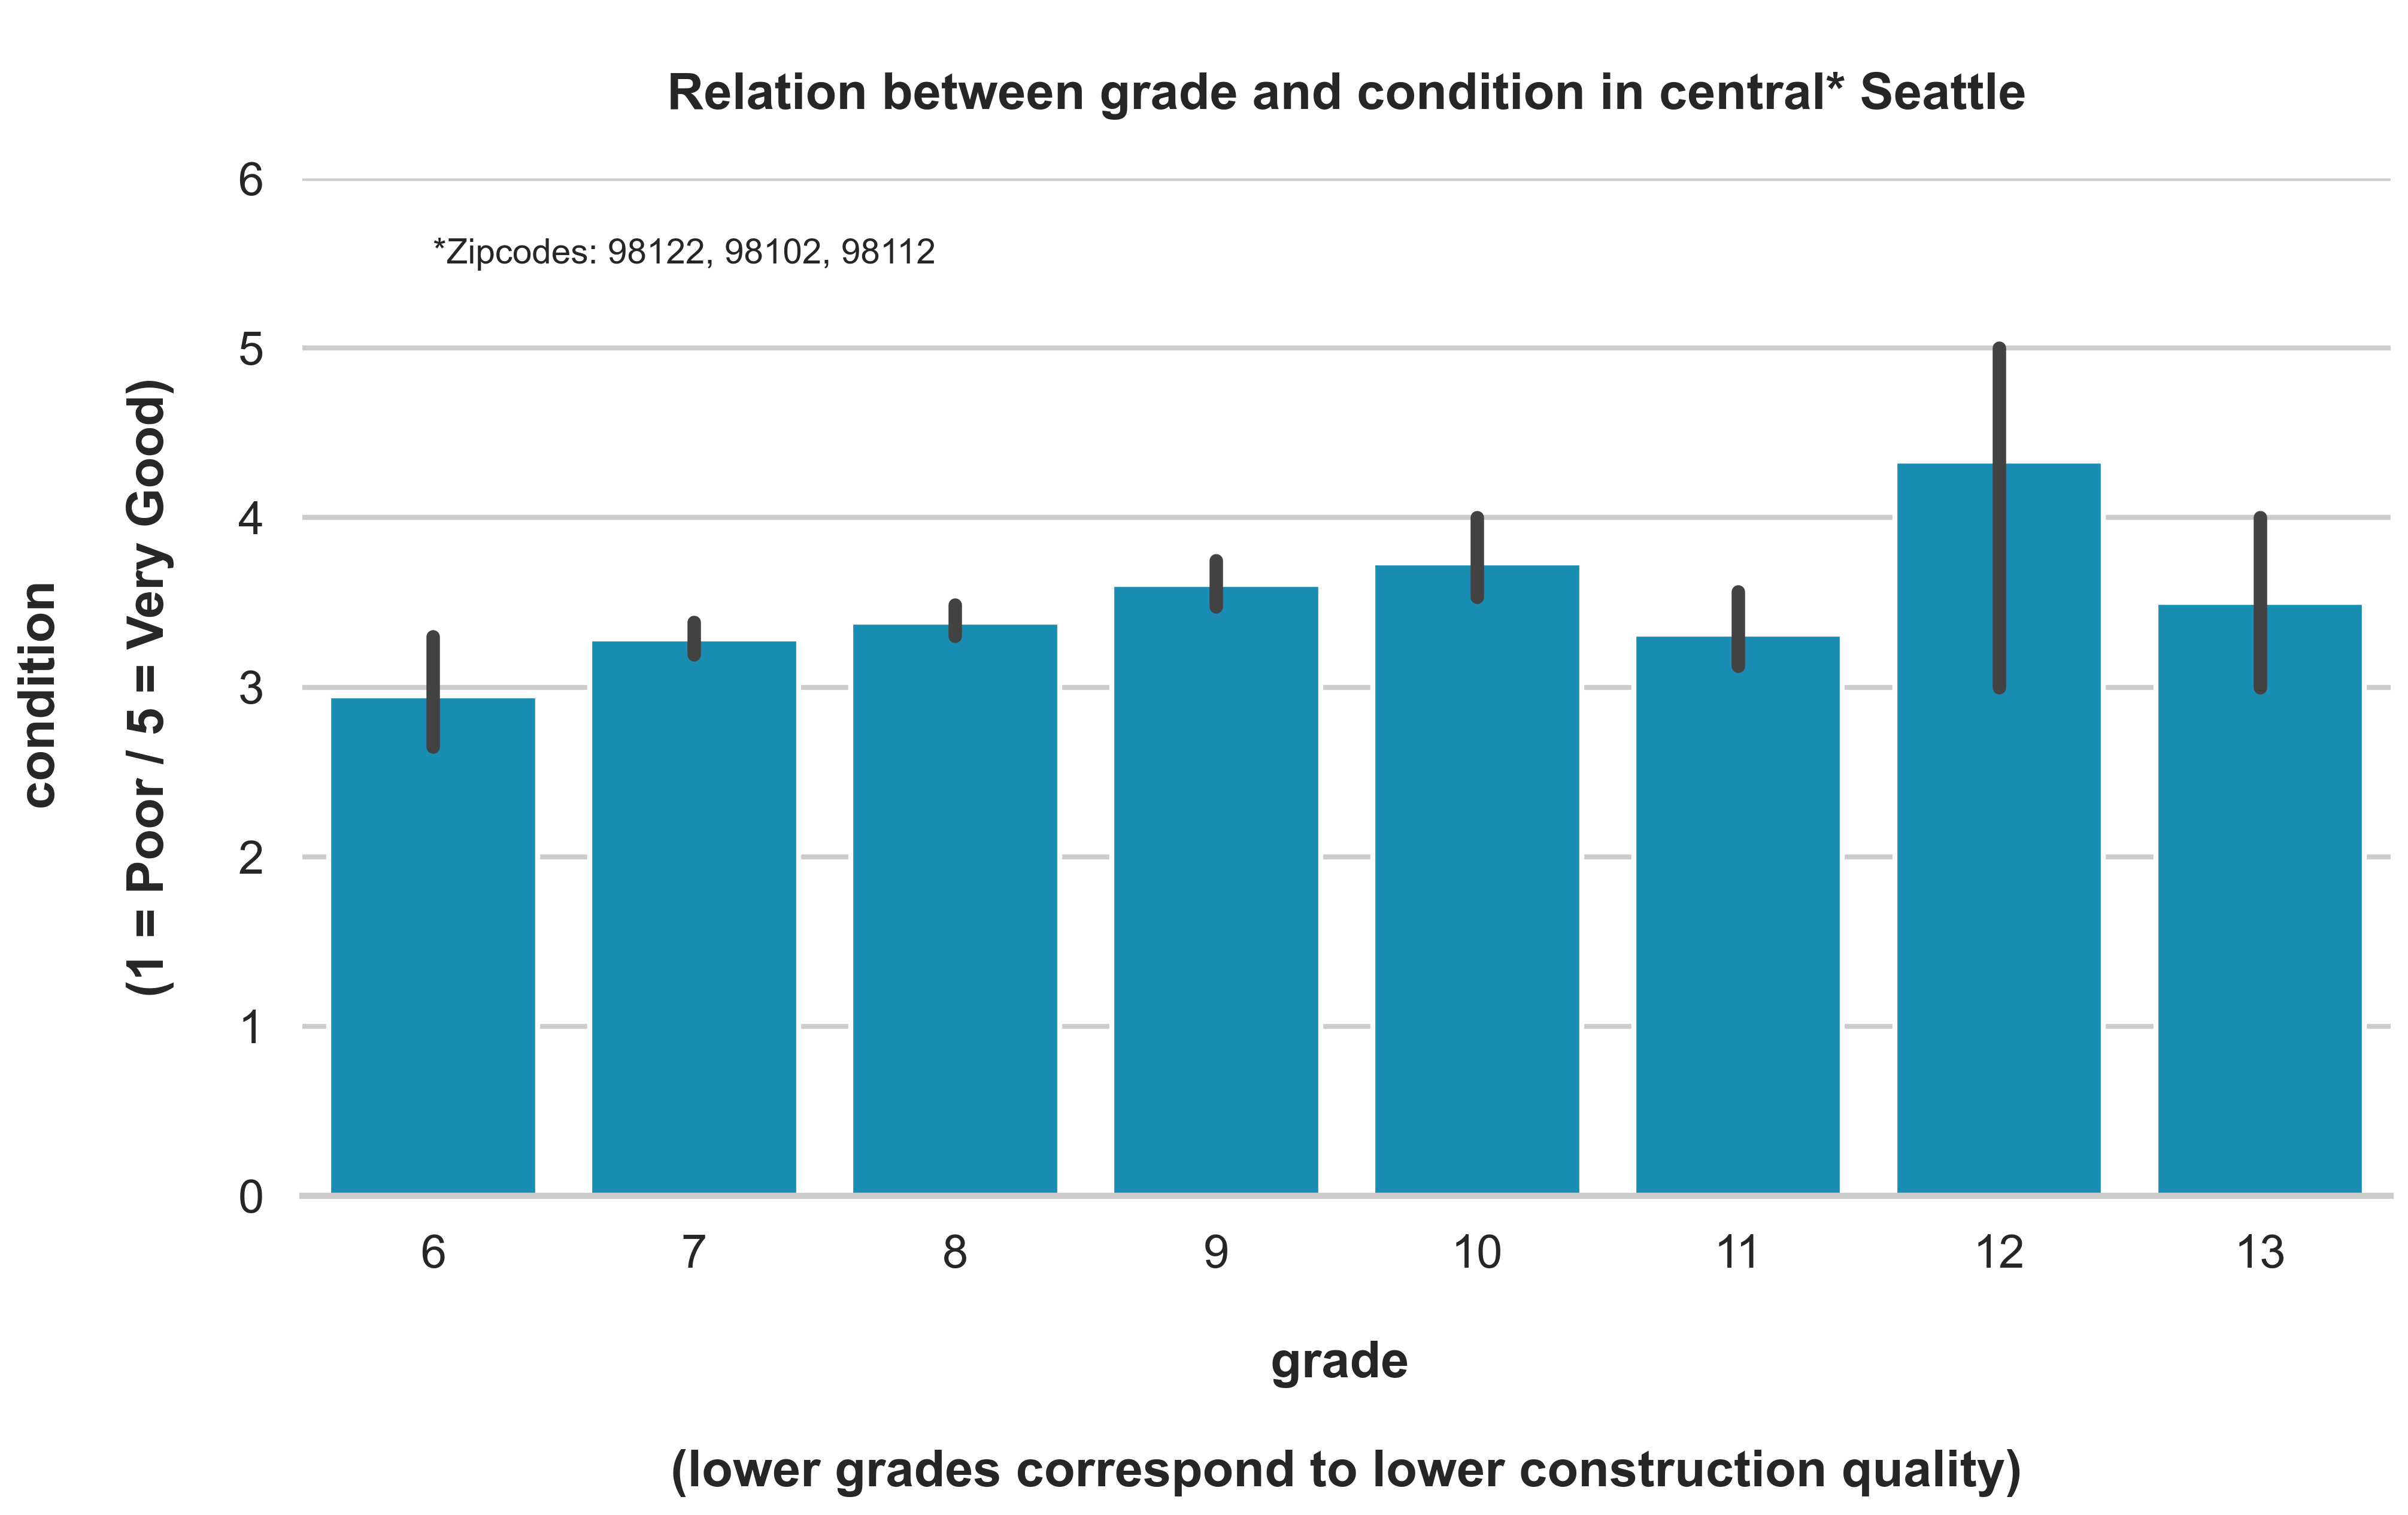

In [200]:
plot = sns.barplot(x=df_central_estates['grade'], y=df_central_estates['condition'], color='#009ACD')
Plot = sns.despine(left=True)

plot.set_xlabel('\ngrade \n \n(lower grades correspond to lower construction quality)', weight='semibold')

plot.set_ylabel('condition \n \n(1 = Poor / 5 = Very Good)\n', weight='semibold')
plot.set_ylim(0,6)

plot.set_title('\nRelation between grade and condition in central* Seattle\n', weight='semibold')

plot.annotate('*Zipcodes: 98122, 98102, 98112', xy=(0,5.5), fontsize=14)


It seems like there is no correlation between condition and grade

Text(0, 7500000.0, '*Zipcodes: 98122, 98102, 98112')

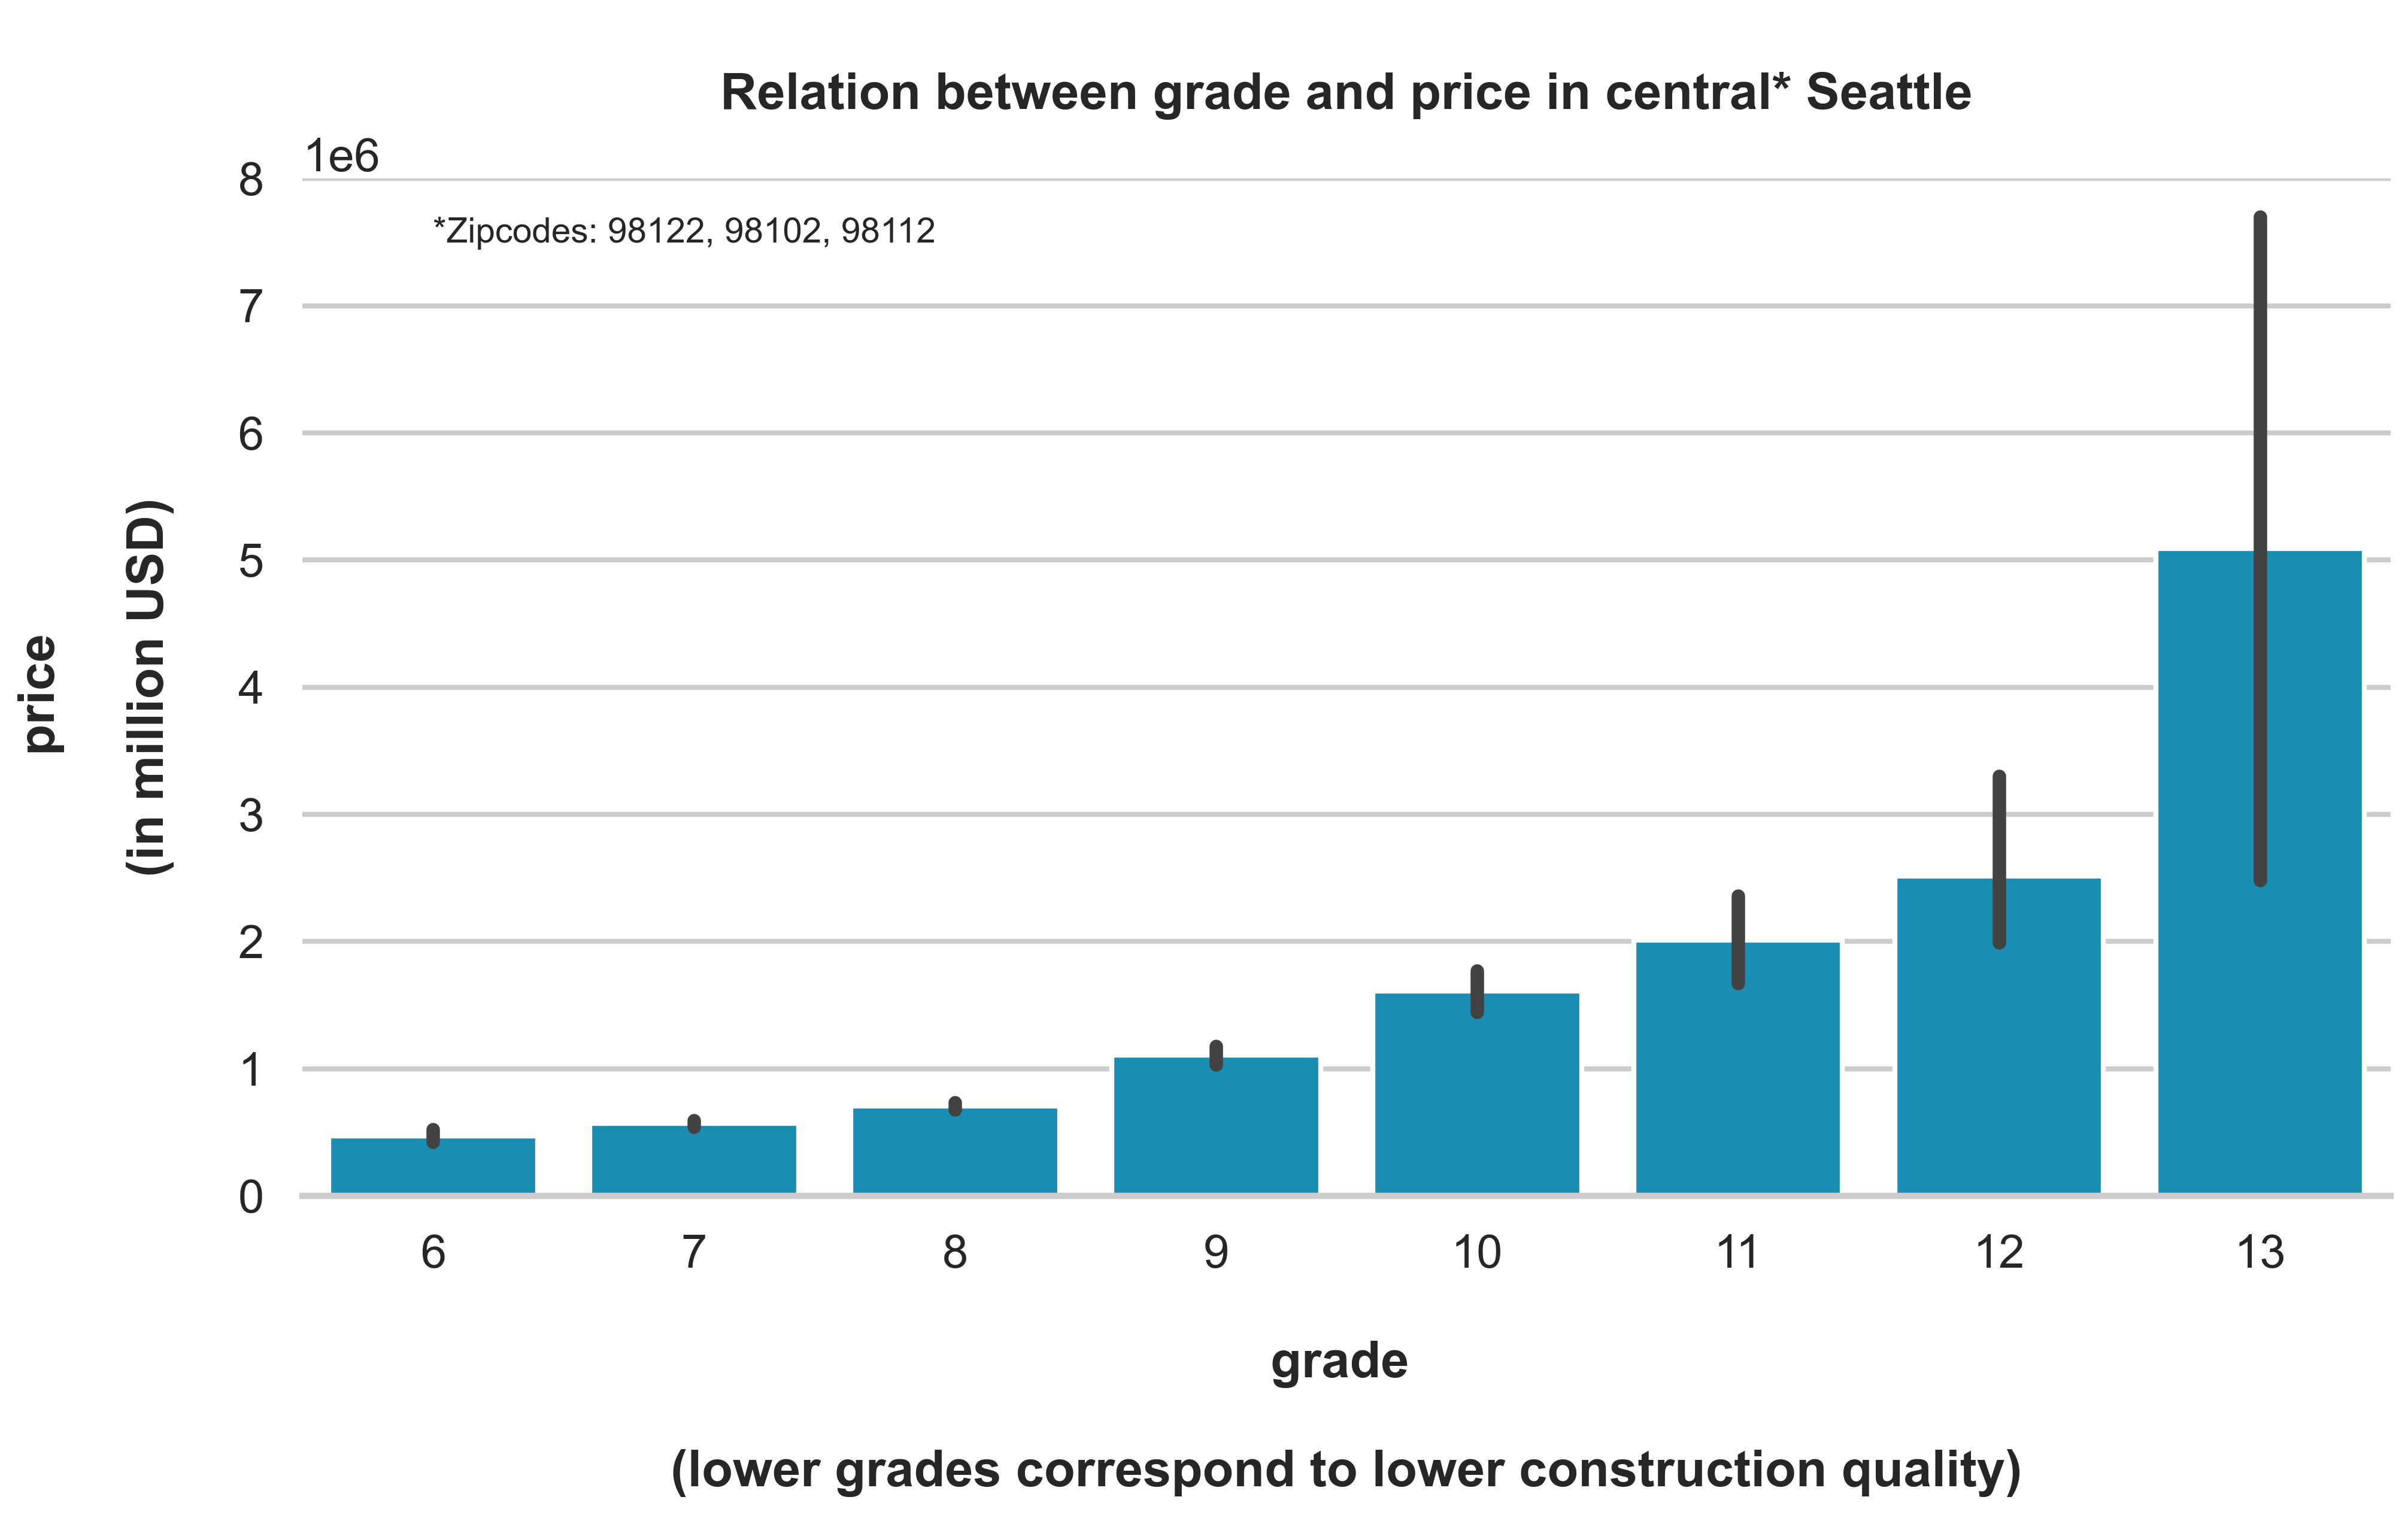

In [201]:
plot = sns.barplot(x=df_central_estates['grade'], y=df_central_estates['price'], color='#009ACD')

plot.set_xlabel('\ngrade \n \n(lower grades correspond to lower construction quality)', weight='semibold')
Plot = sns.despine(left=True)

plot.set_ylabel('price \n \n(in million USD)\n', weight='semibold')
plot.set_ylim(0,8e6)

plot.set_title('\nRelation between grade and price in central* Seattle\n', weight='semibold')

plot.annotate('*Zipcodes: 98122, 98102, 98112', xy=(0,7.5e6), fontsize=14)

In [227]:
top_grades = [12, 13]
mean_value_grade_12_13 = df_central_estates[['price', 'grade']].query('grade == @top_grades').mean().reset_index()
mean_value_grade_12_13

index           0
0  price 3544000.000
1  grade      12.400

Text(0, 1500000.0, '*Zipcodes: 98122, 98102, 98112')

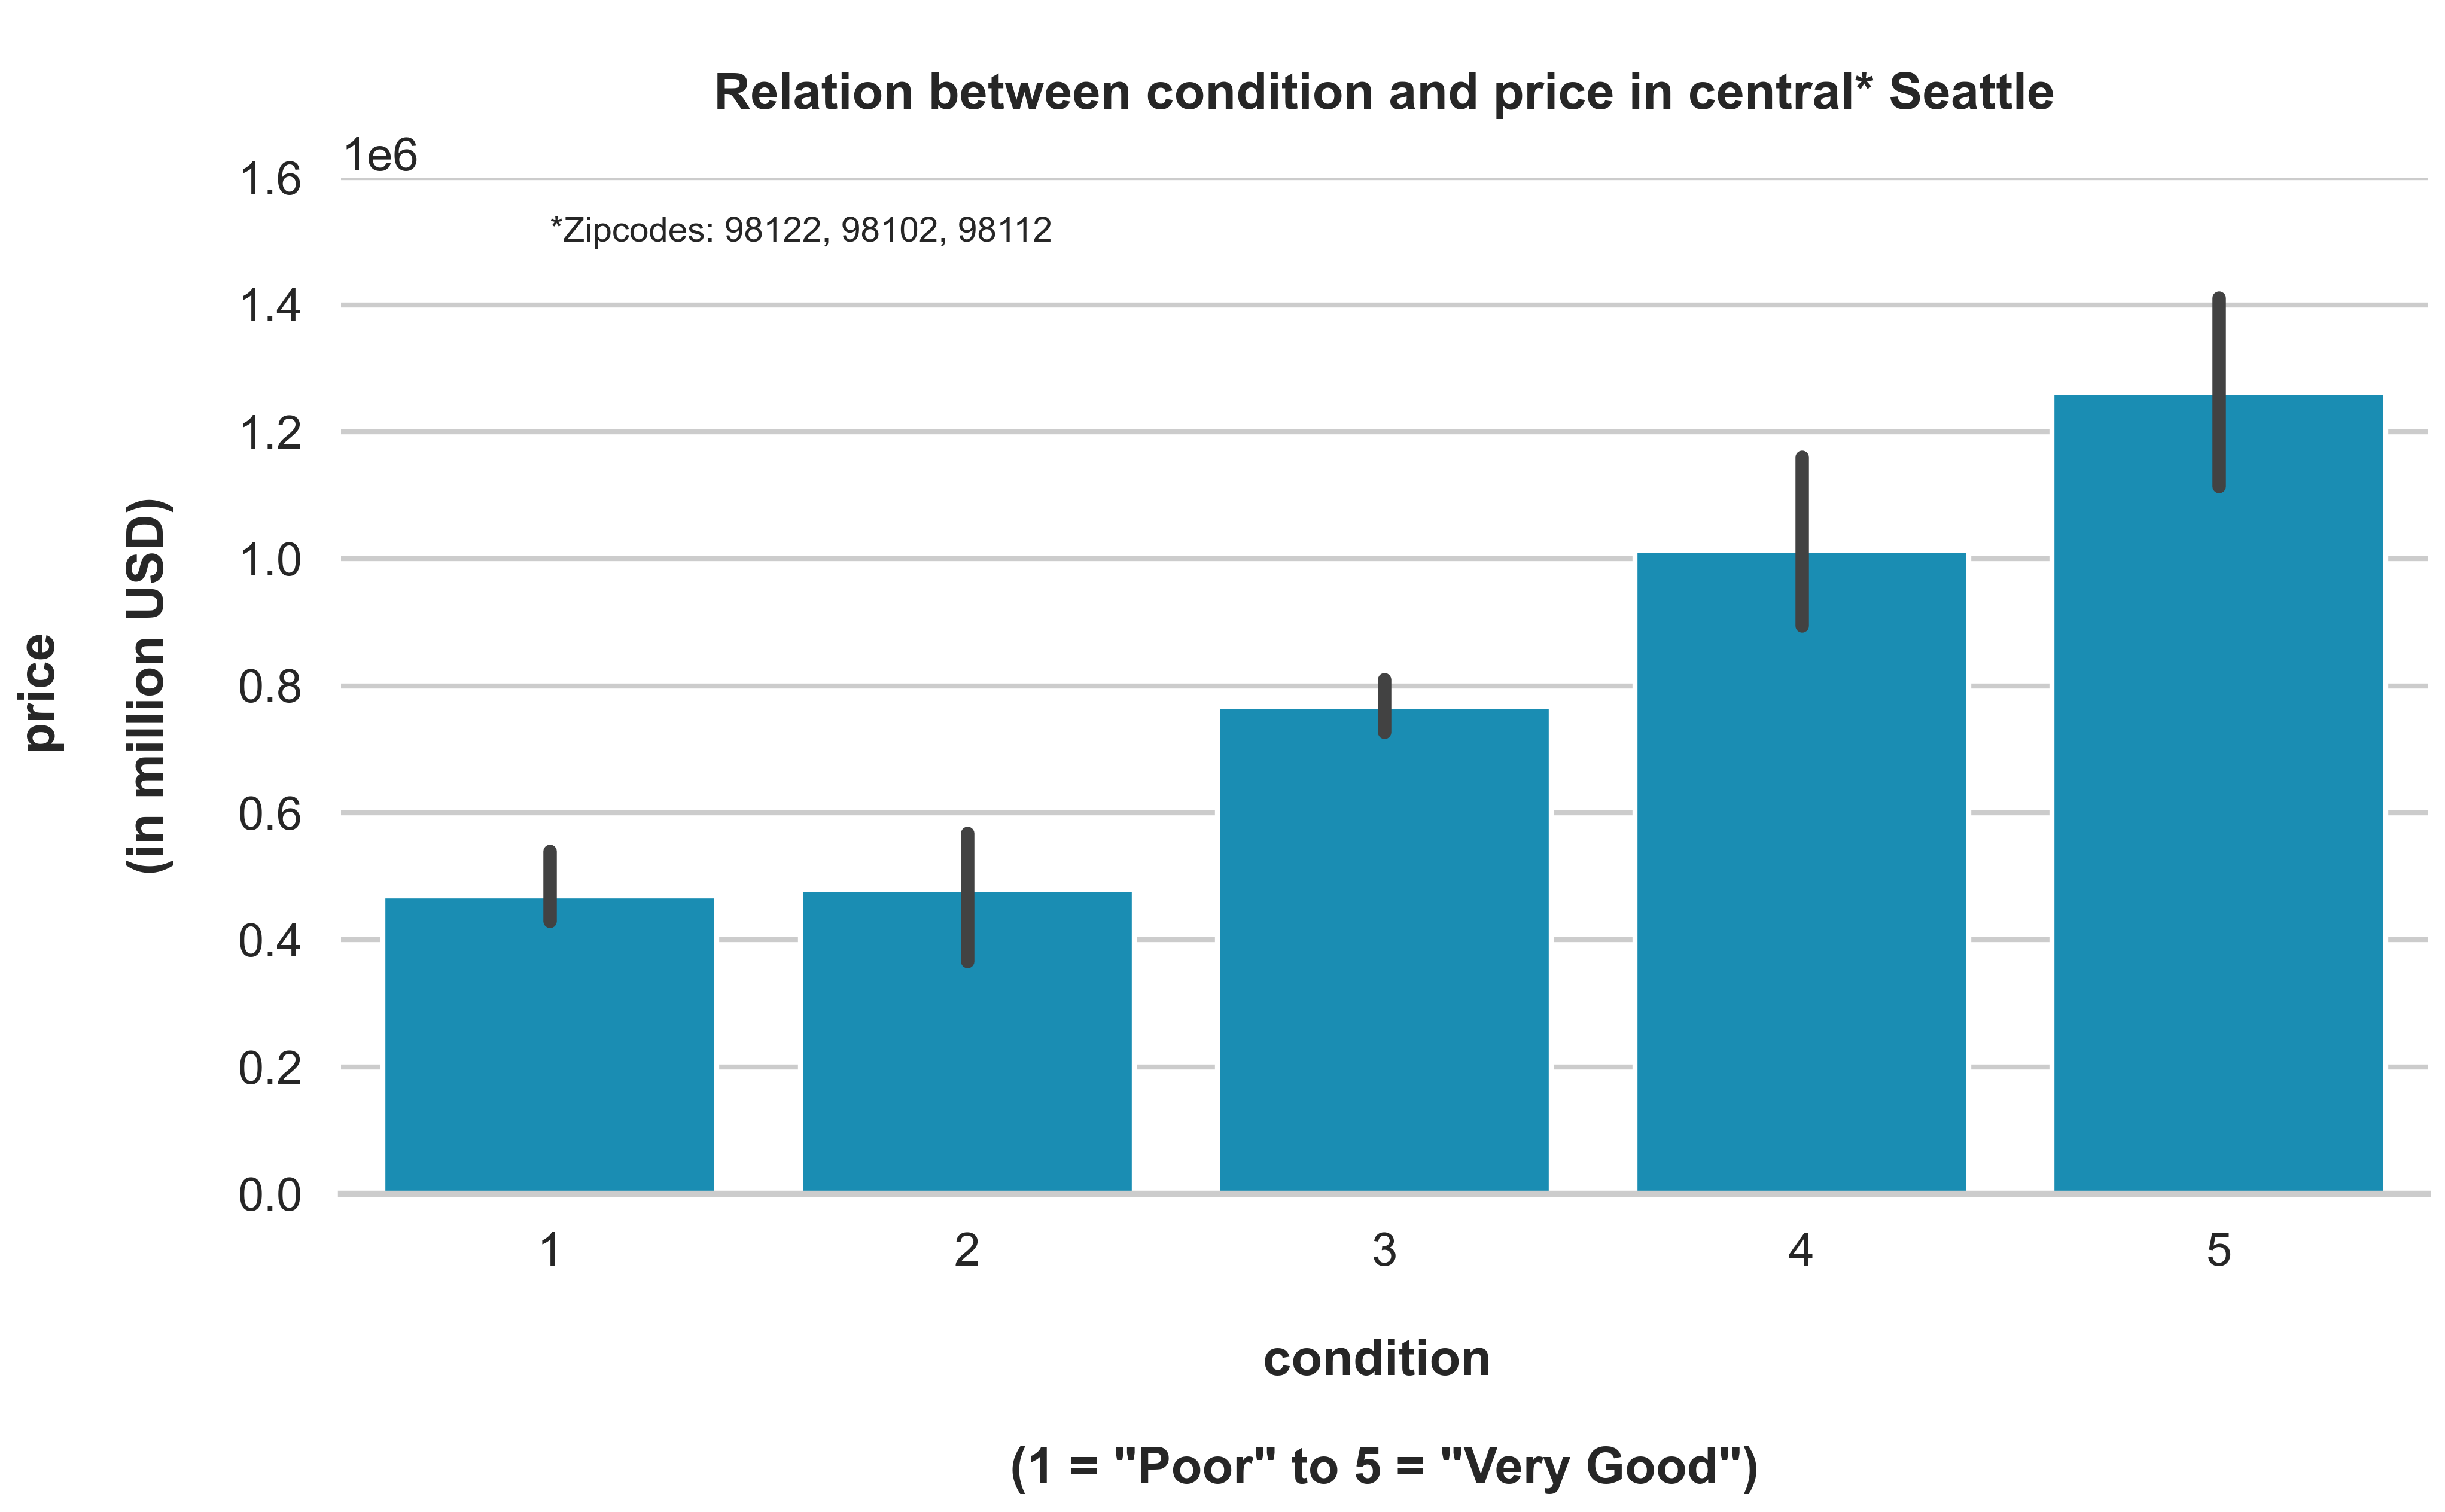

In [202]:
plot = sns.barplot(x=df_central_estates['condition'], y=df_central_estates['price'], color='#009ACD')

plot.set_xlabel('\ncondition \n \n(1 = "Poor" to 5 = "Very Good")', weight='semibold')
Plot = sns.despine(left=True)

plot.set_ylabel('price \n \n(in million USD)\n', weight='semibold')
plot.set_ylim(0,1.6e6)

plot.set_title('\nRelation between condition and price in central* Seattle\n', weight='semibold')

plot.annotate('*Zipcodes: 98122, 98102, 98112', xy=(0,1.5e6), fontsize=14)

In [203]:
df_central_estates_month = df[['date', 'zipcode', 'grade', 'condition', 'price']].query('zipcode == @central_seattle').groupby(['date', 'zipcode', 'grade', 'condition', 'price']).count().sort_values('date', ascending=False).reset_index()

In [204]:
plt.rcParams['figure.figsize']=(15,7.5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='whitegrid')
sns.set_context('poster', font_scale=0.85)

In [232]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month

df_central_estates_month_yr = df[['year', 'month', 'price', 'zipcode']].query('zipcode == @central_seattle').sort_values('price', ascending=False).reset_index()

df_central_estates_month_yr2014 = df_central_estates_month_yr[['year', 'month', 'price', 'zipcode']].query('year == 2014').sort_values('price', ascending=False).reset_index()

Text(0, 1100000.0, '*Zipcodes: 98122, 98102, 98112')

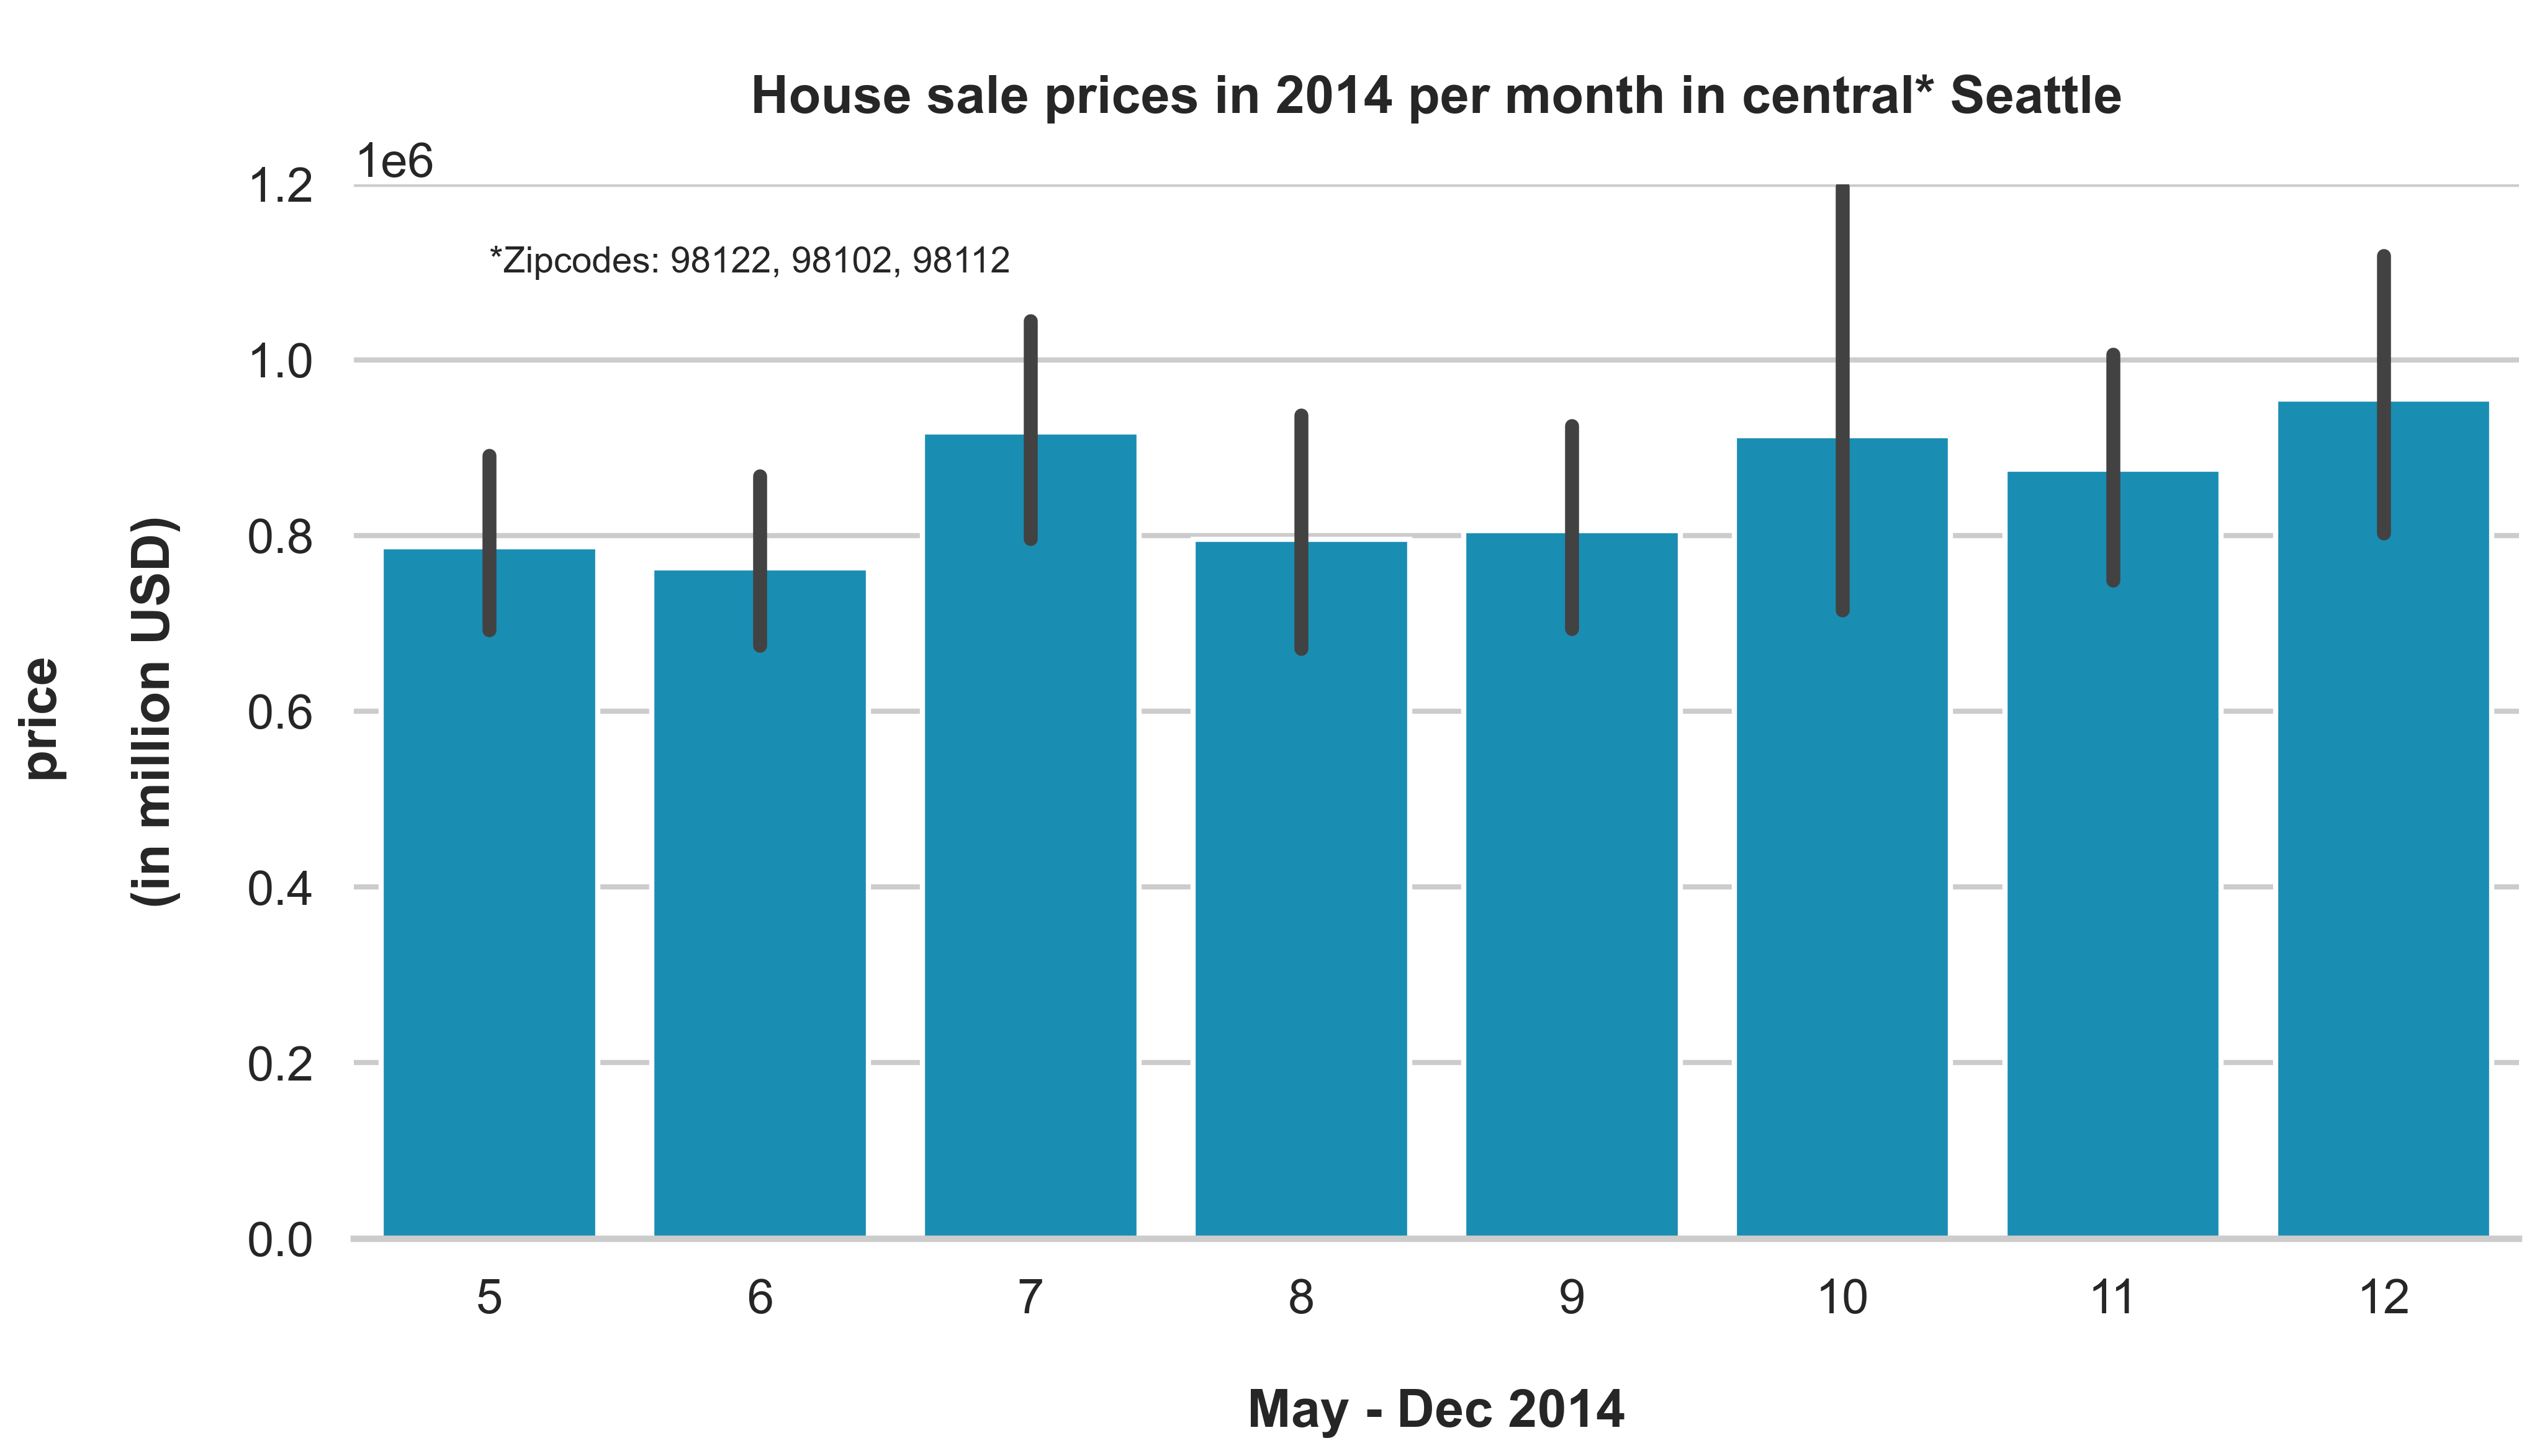

In [218]:
plot = sns.barplot(x=df_central_estates_month_yr2014['month'], y=df_central_estates_month_yr2014['price'], color='#009ACD')
Plot = sns.despine(left=True)

plot.set_xlabel('\nMay - Dec 2014', weight='semibold')

plot.set_ylabel('price \n \n(in million USD)\n', weight='semibold')
plot.set_ylim(0,1.2e6)

plot.set_title('\nHouse sale prices in 2014 per month in central* Seattle\n', weight='semibold')

plot.annotate('*Zipcodes: 98122, 98102, 98112', xy=(0,1.1e6), fontsize=14)

In [207]:
df_central_estates_month_yr2015 = df_central_estates_month_yr[['year', 'month', 'price', 'zipcode']].query('year == 2015').sort_values('price', ascending=False).reset_index()

Text(0, 1300000.0, '*Zipcodes: 98122, 98102, 98112')

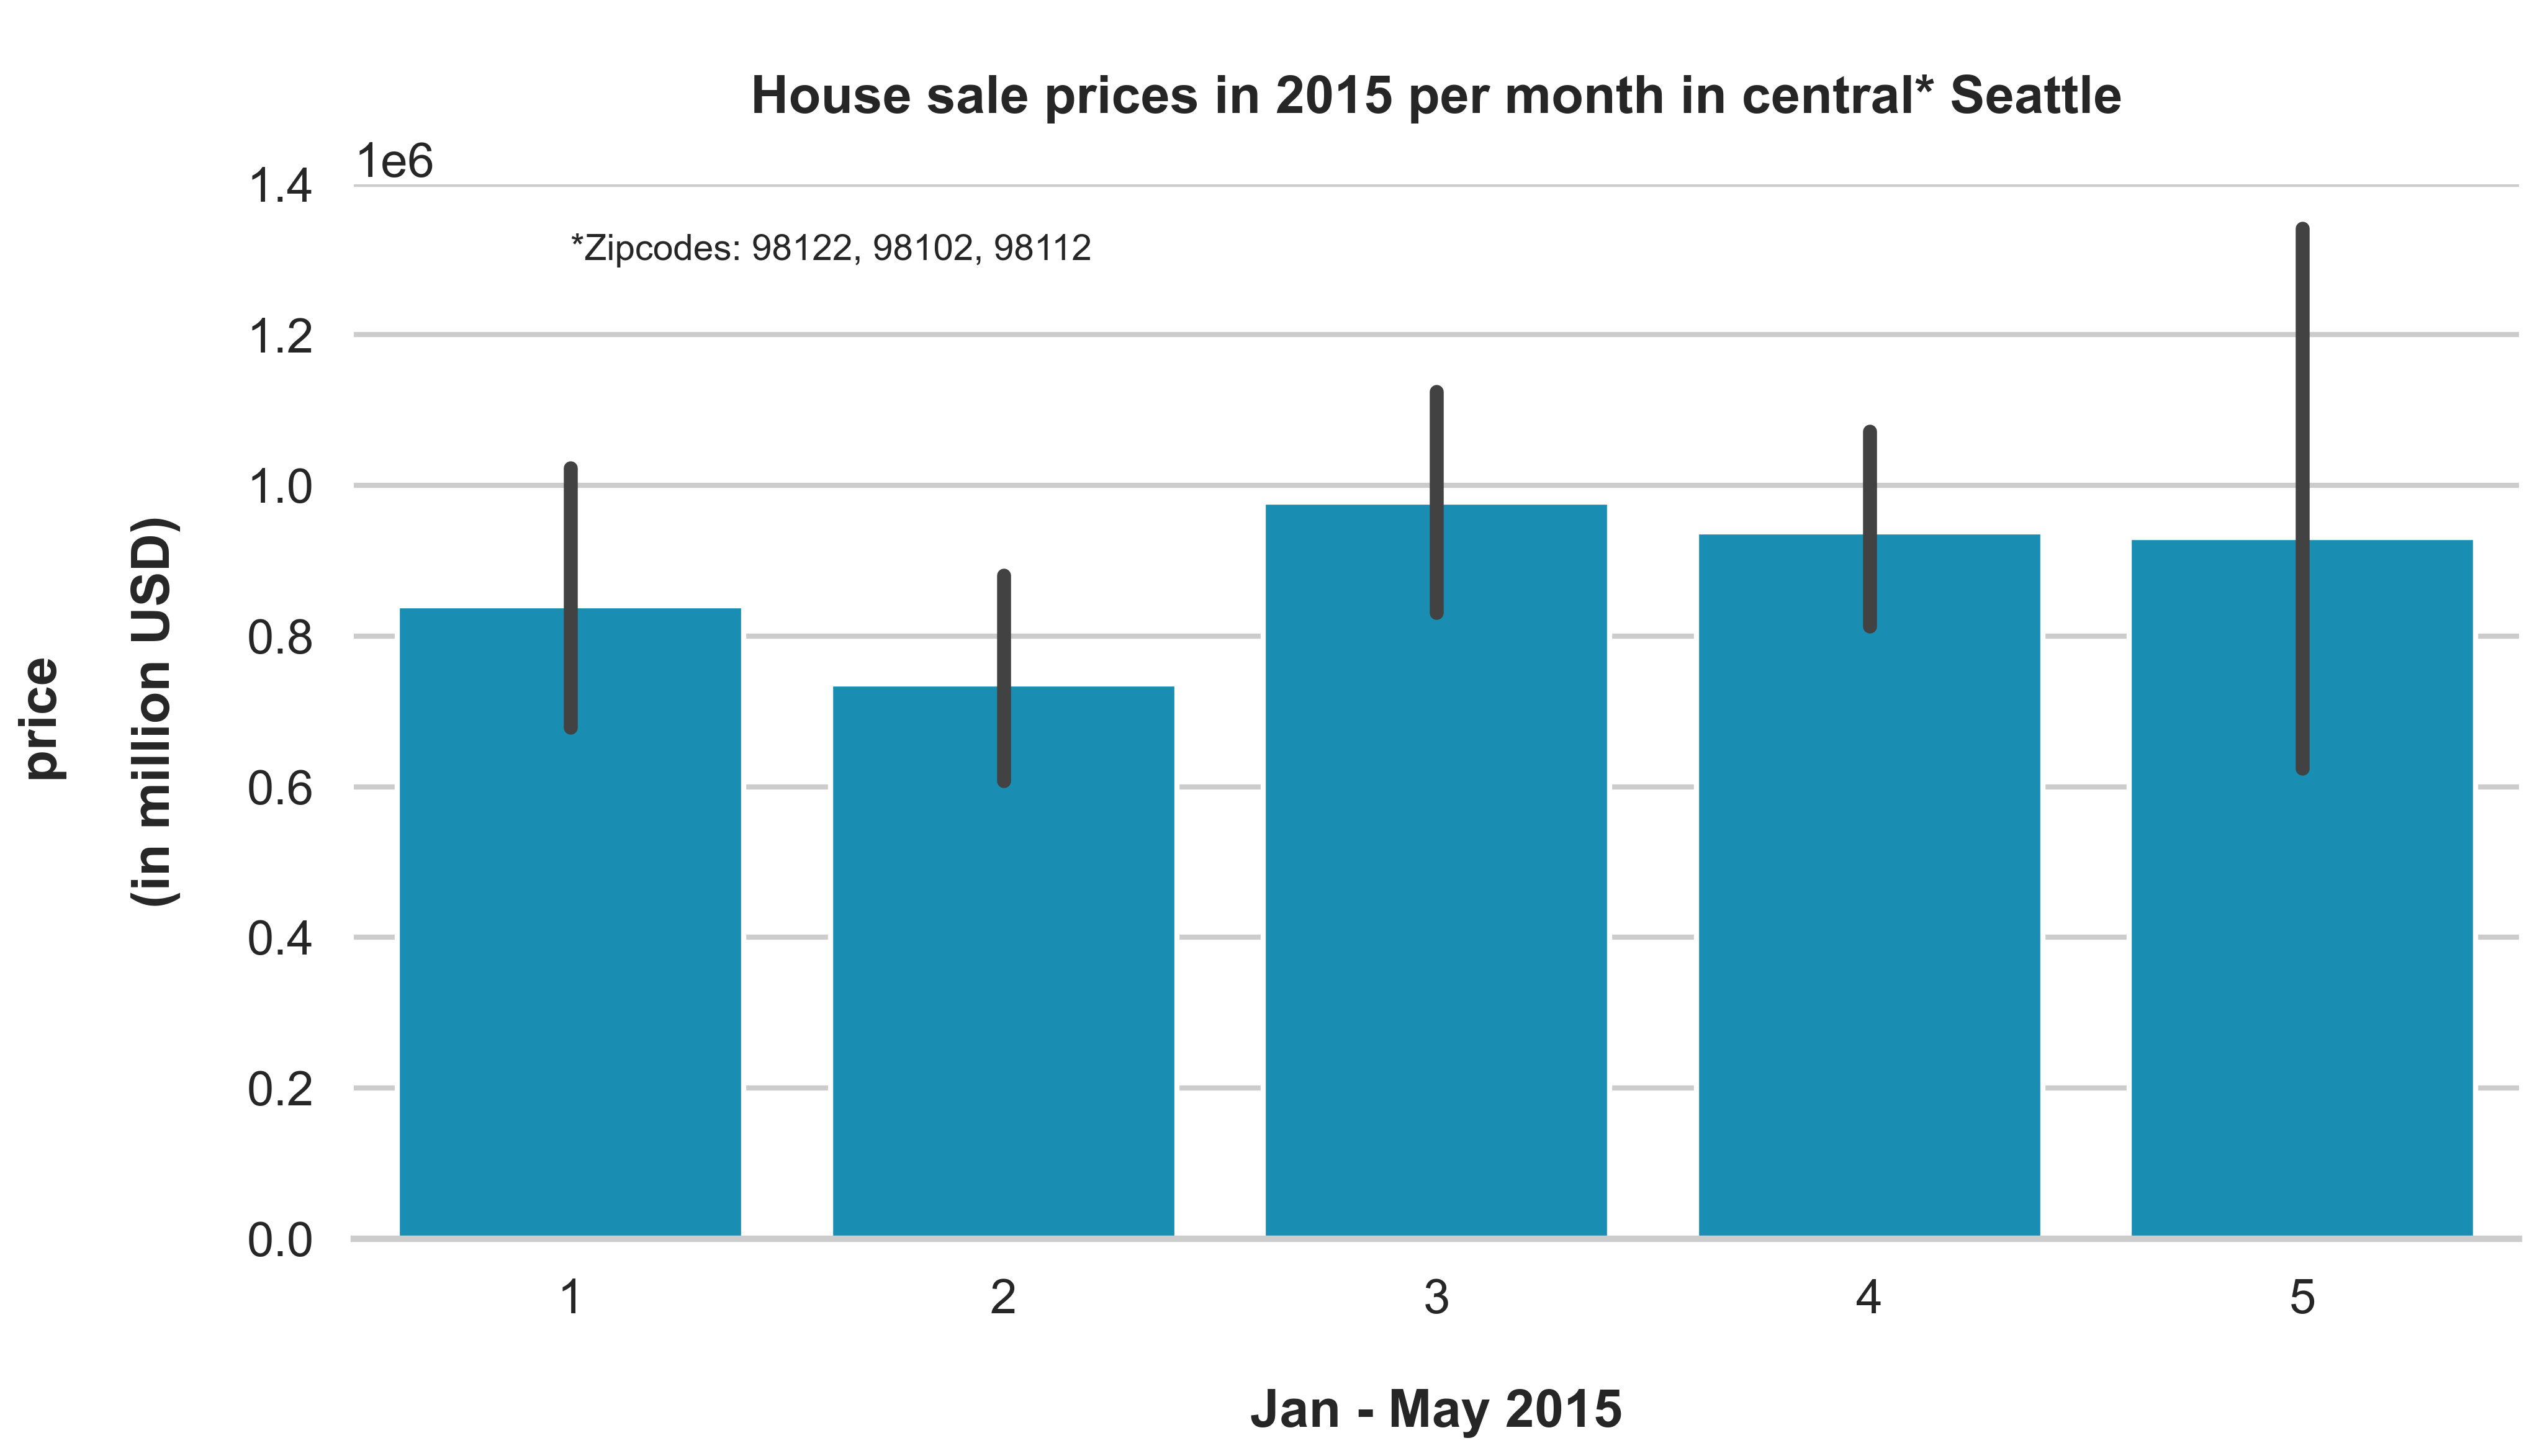

In [219]:
plot = sns.barplot(x=df_central_estates_month_yr2015['month'], y=df_central_estates_month_yr2015['price'], color='#009ACD')
Plot = sns.despine(left=True)

plot.set_xlabel('\nJan - May 2015', weight='semibold')
#plot.set_xlim(0,12)

plot.set_ylabel('price \n \n(in million USD)\n', weight='semibold')
plot.set_ylim(0,1.4e6)

plot.set_title('\nHouse sale prices in 2015 per month in central* Seattle\n', weight='semibold')

plot.annotate('*Zipcodes: 98122, 98102, 98112', xy=(0,1.3e6), fontsize=14)

In [239]:
df_central_estates_month_yr_count2014 = df_central_estates_month_yr2014['month'].value_counts().reset_index()
df_central_estates_month_yr_count2014.columns = ['month', 'count']
df_central_estates_month_yr_count2014

month  count
0      7     76
1      6     74
2      9     63
3     10     61
4      5     59
5     11     53
6     12     50
7      8     43

In [211]:
plt.rcParams['figure.figsize']=(15,7.5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='whitegrid')
sns.set_context('poster', font_scale=0.85)

Text(7, 2, '50')

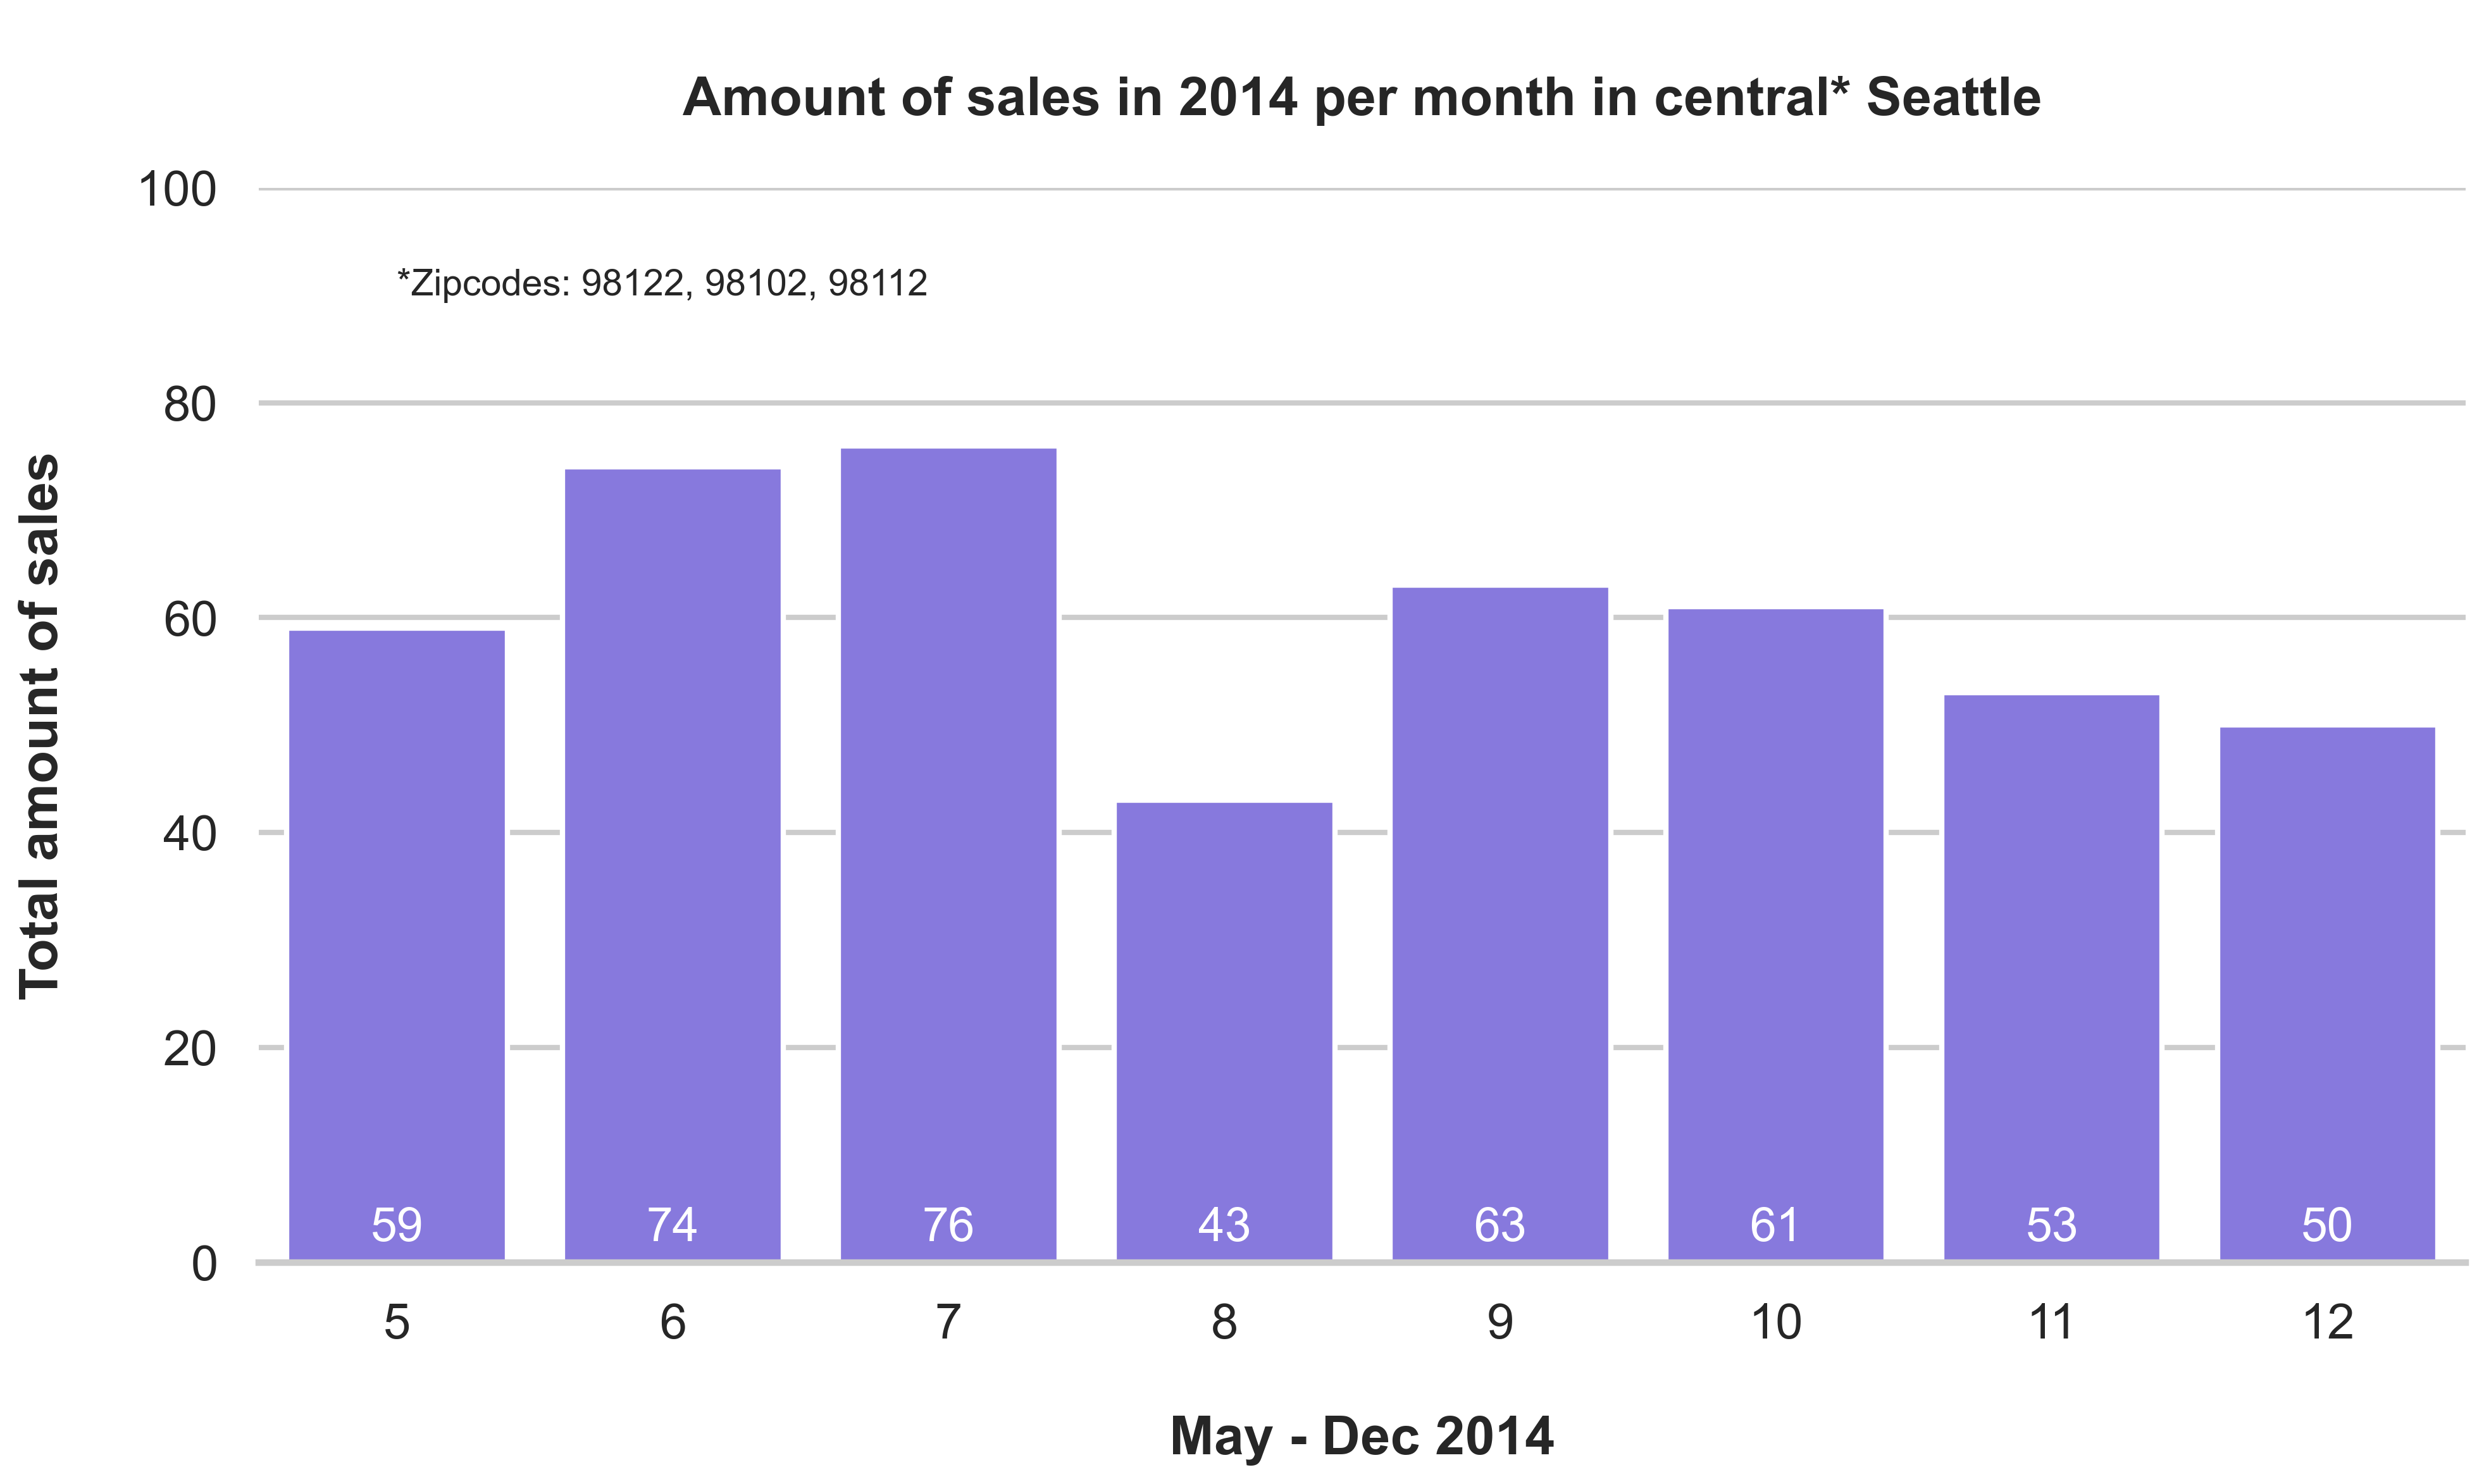

In [220]:
plot = sns.barplot(x=df_central_estates_month_yr_count2014['month'], y=df_central_estates_month_yr_count2014['count'], color='#7b68ee')
Plot = sns.despine(left=True)

plot.set_xlabel('\nMay - Dec 2014', weight='semibold')

plot.set_ylabel('Total amount of sales\n', weight='semibold')
plot.set_ylim(0,100)

plot.set_title('\nAmount of sales in 2014 per month in central* Seattle\n', weight='semibold')

plot.annotate('*Zipcodes: 98122, 98102, 98112', xy=(0,90), fontsize=14)
plot.text(x=0, y=2, s=59, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=1, y=2, s=74, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=2, y=2, s=76, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=3, y=2, s=43, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=4, y=2, s=63, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=5, y=2, s=61, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=6, y=2, s=53, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=7, y=2, s=50, color='white', fontsize=18, horizontalalignment='center')

In [240]:
df_central_estates_month_yr_count2015 = df_central_estates_month_yr2015['month'].value_counts().reset_index()
df_central_estates_month_yr_count2015.columns = ['month', 'count']
df_central_estates_month_yr_count2015

month  count
0      4     57
1      3     49
2      2     34
3      1     28
4      5     16

Text(4, 2, '16')

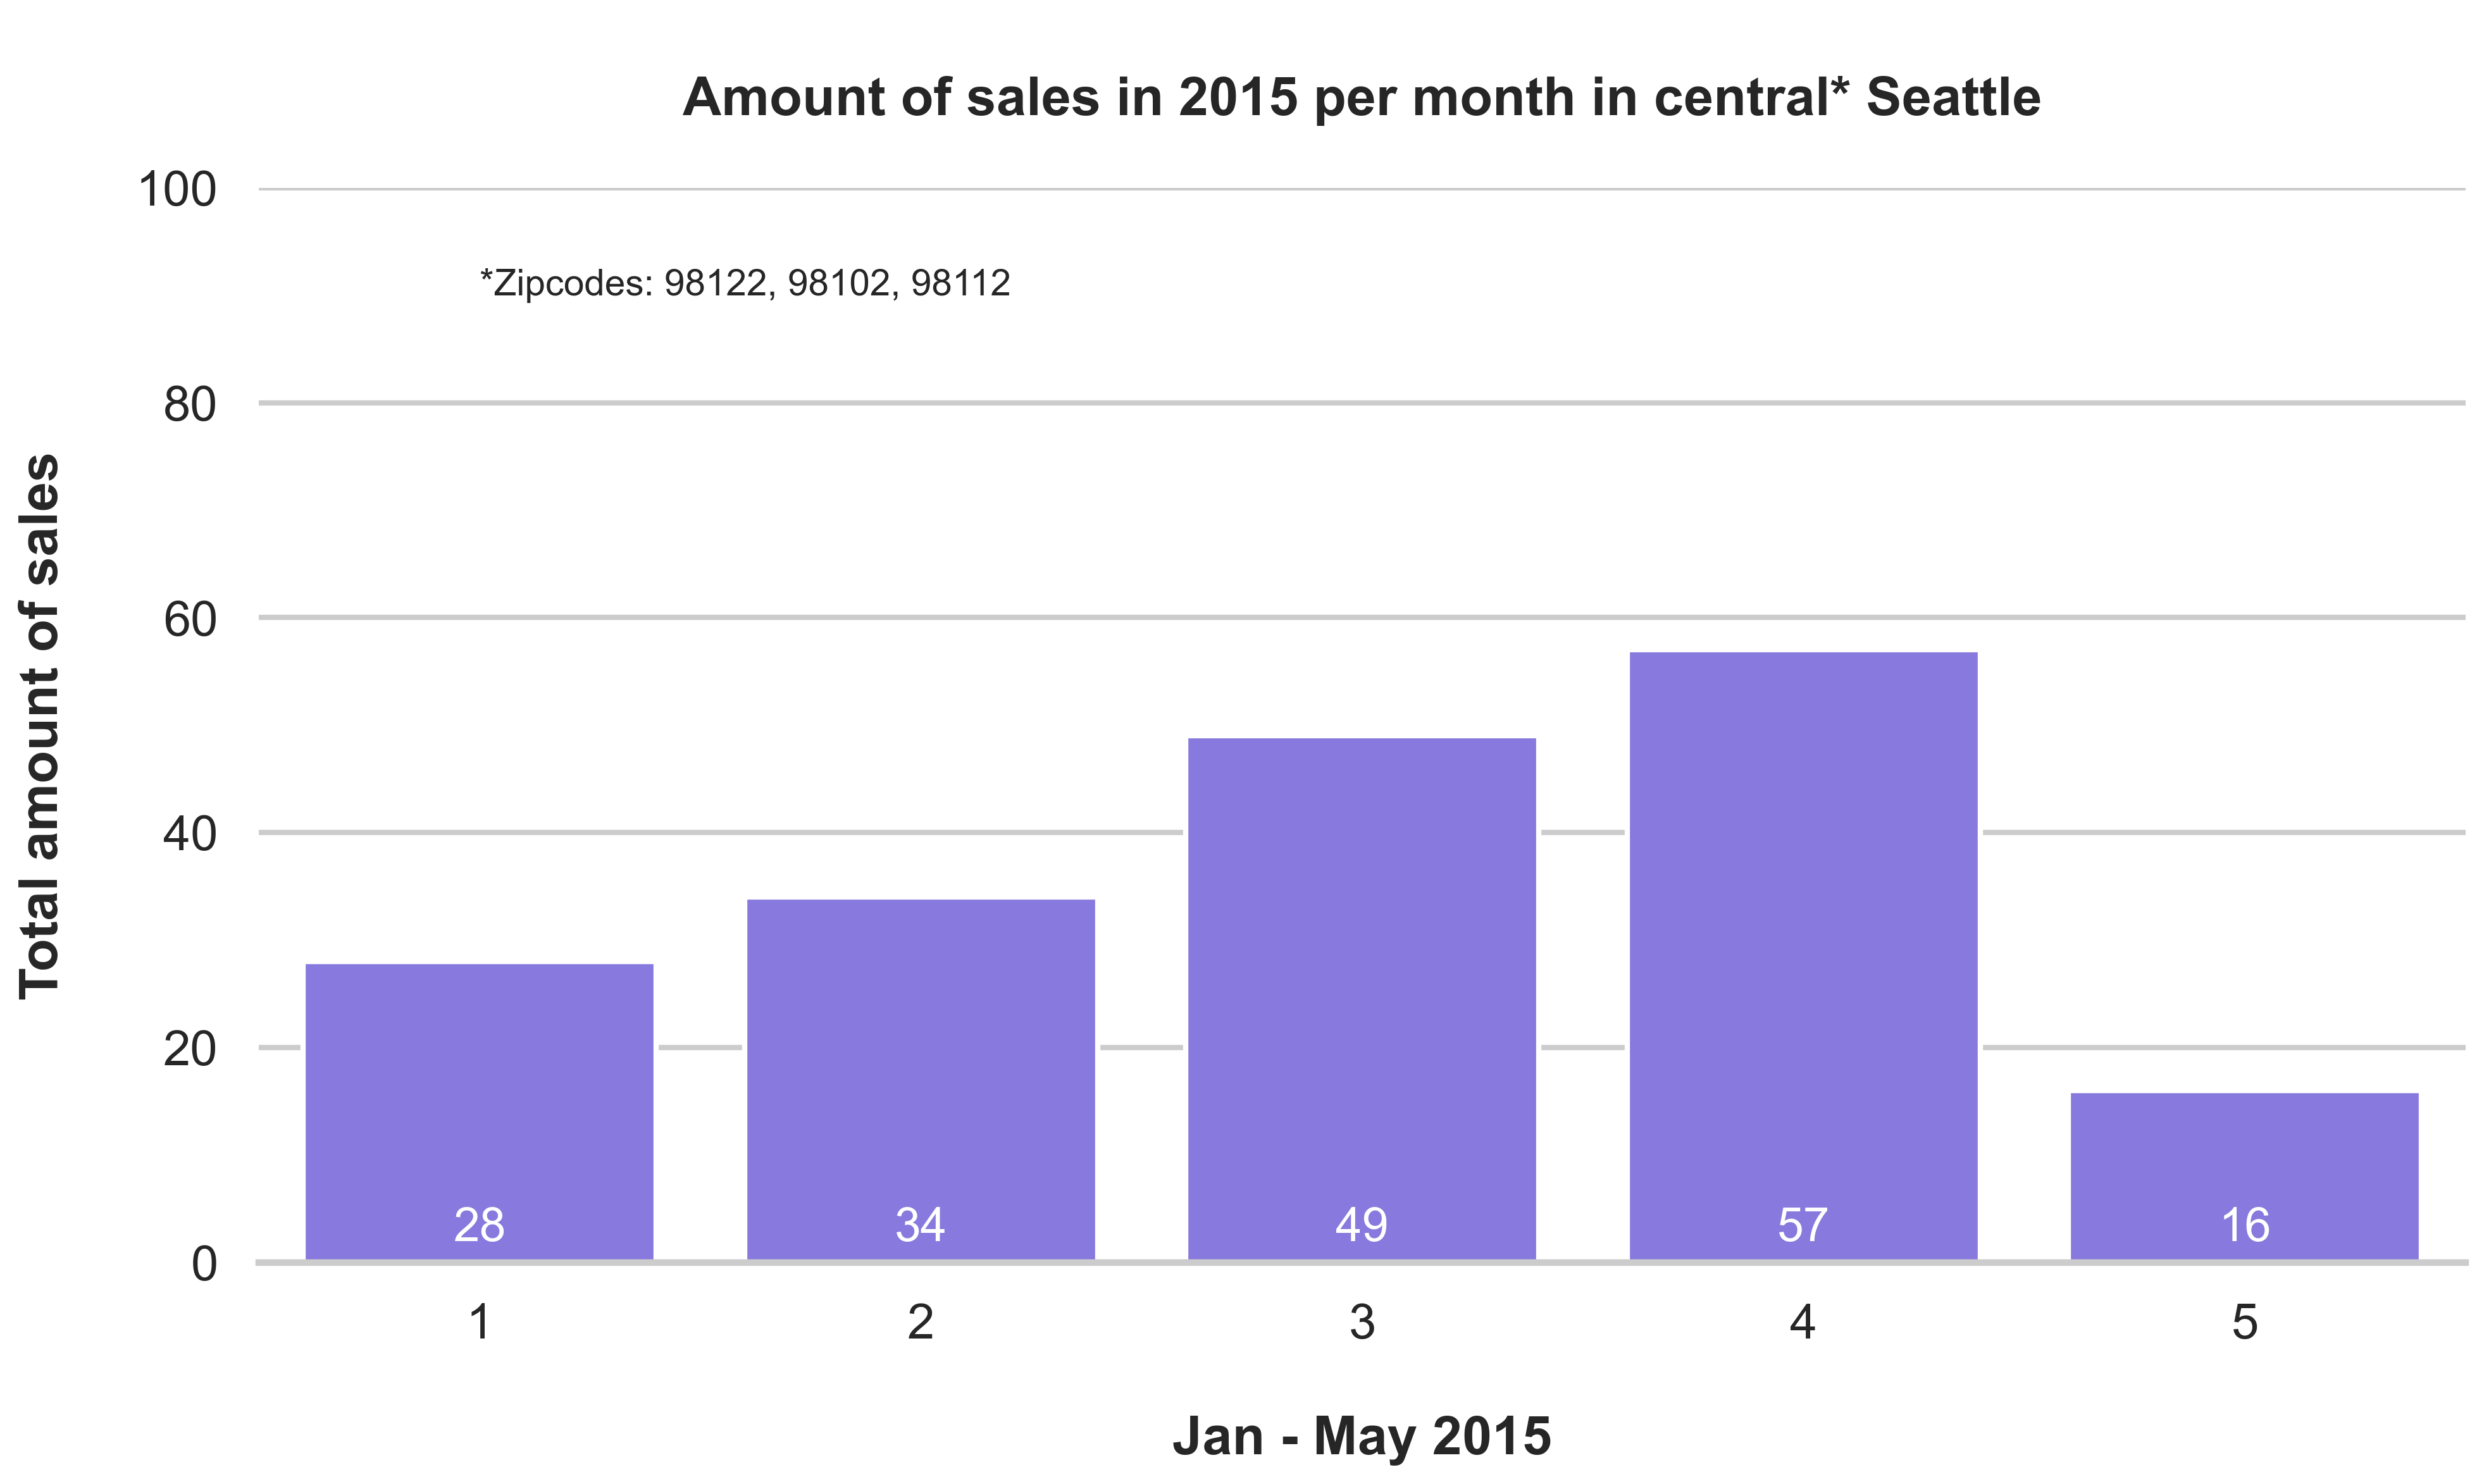

In [221]:
plot = sns.barplot(x=df_central_estates_month_yr_count2015['month'], y=df_central_estates_month_yr_count2015['count'], color='#7b68ee')
Plot = sns.despine(left=True)

plot.set_xlabel('\nJan - May 2015', weight='semibold')

plot.set_ylabel('Total amount of sales\n', weight='semibold')
plot.set_ylim(0,100)

plot.set_title('\nAmount of sales in 2015 per month in central* Seattle\n', weight='semibold')

plot.annotate('*Zipcodes: 98122, 98102, 98112', xy=(0,90), fontsize=14)
plot.text(x=0, y=2, s=28, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=1, y=2, s=34, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=2, y=2, s=49, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=3, y=2, s=57, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=4, y=2, s=16, color='white', fontsize=18, horizontalalignment='center')

In [233]:
mean_value_all_sales_2014 = df_central_estates_month_yr2014[['price', 'year']].mean().reset_index()
mean_value_all_sales_2014

index          0
0  price 850992.777
1   year   2014.000

In [234]:
mean_value_all_sales_2015 = df_central_estates_month_yr2015[['price', 'year']].mean().reset_index()
mean_value_all_sales_2015

index          0
0  price 895890.288
1   year   2015.000

In [110]:
# Central area of Seattle https://www.usmapguide.com/washington/seattle-zip-code-map/
outskirts_seattle = [98177, 98133, 98155, 98125, 98146, 98168, 98178]

In [131]:
df_outskirts_estates = df[['zipcode', 'bedrooms', 'bathrooms', 'price']].query('zipcode == @outskirts_seattle').groupby(['zipcode', 'bedrooms', 'bathrooms', 'price']).count().sort_values('price', ascending=False).reset_index()

In [229]:
df_loc = df[['lat', 'long', 'zipcode']].query('zipcode == @outskirts_seattle').reset_index()
locations = px.scatter_mapbox(df_loc, lat="lat", lon ="long", mapbox_style ="stamen-terrain", zoom =9,  width = 1000, height=600)
locations.show()

Text(0, 7.5, '*Zipcodes: 98177, 98133, 98155, 98125, 98146, 98168, 98178')

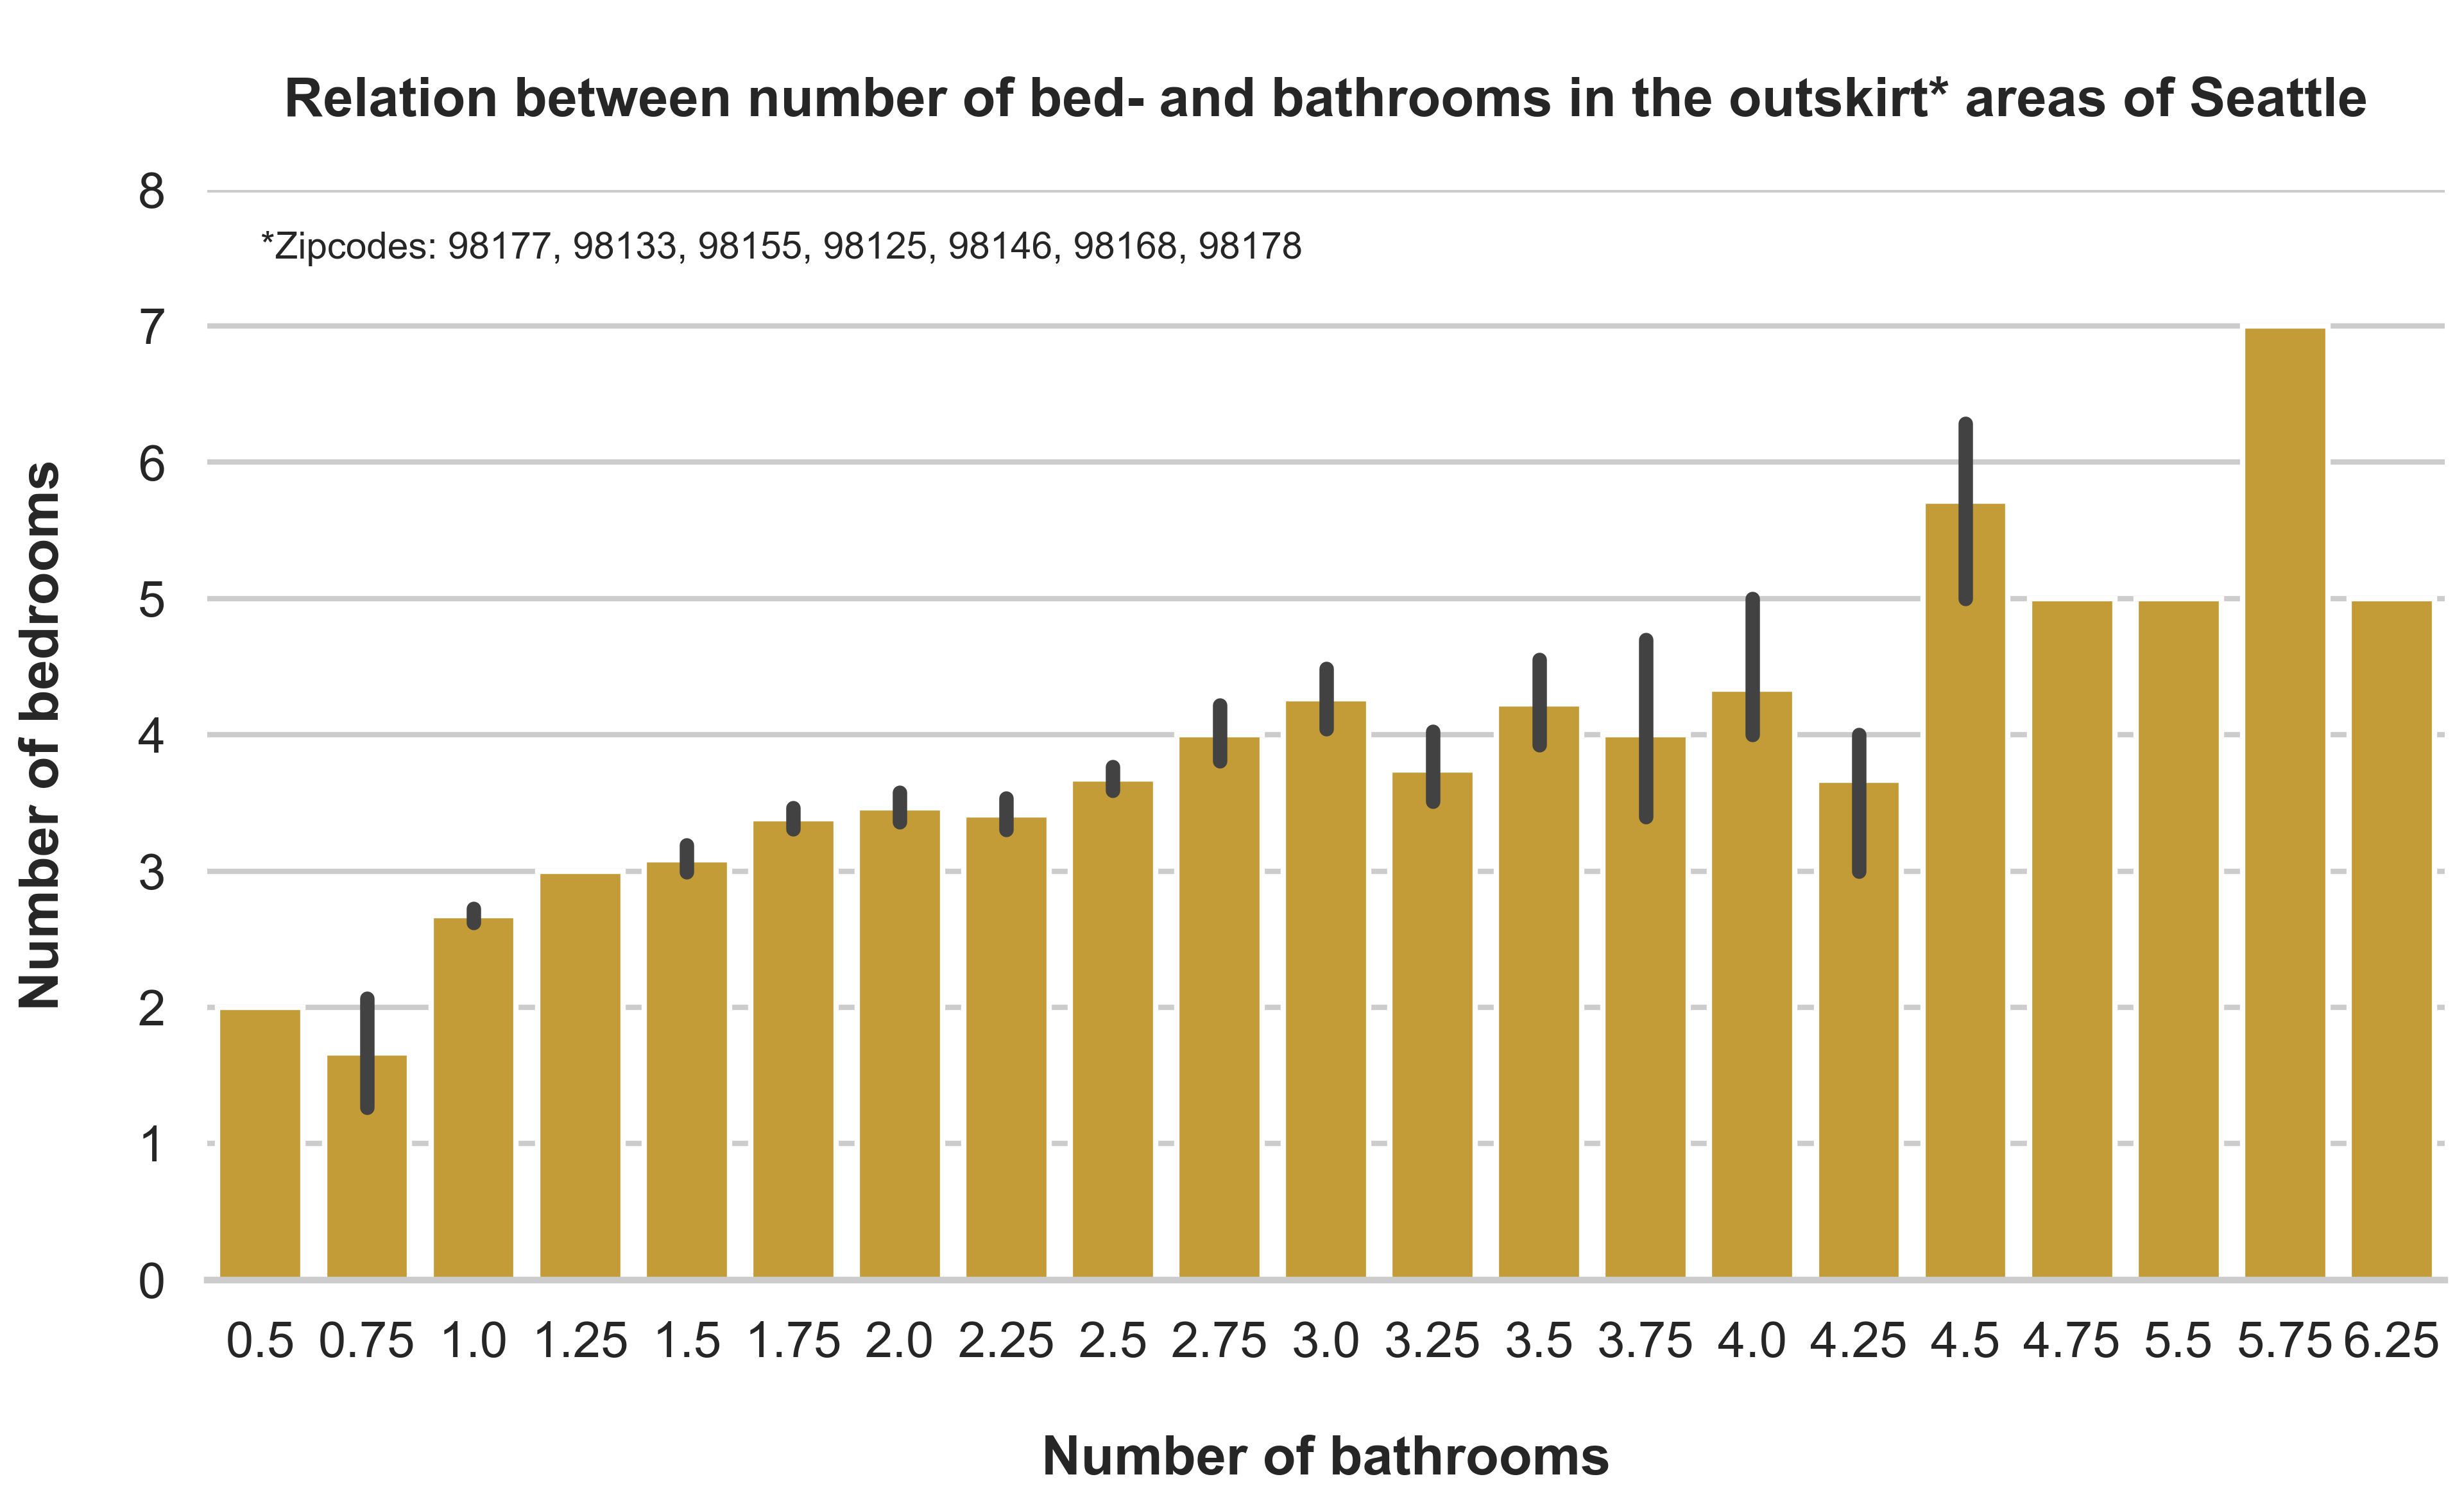

In [112]:
plot = sns.barplot(x=df_outskirts_estates['bathrooms'], y=df_outskirts_estates['bedrooms'], color='#daa520')
Plot = sns.despine(left=True)

plot.set_xlabel('\nNumber of bathrooms', weight='semibold')

plot.set_ylabel('Number of bedrooms\n', weight='semibold')
plot.set_ylim(0,8)

plot.set_title('\nRelation between number of bed- and bathrooms in the outskirt* areas of Seattle\n', weight='semibold')

plot.annotate('*Zipcodes: 98177, 98133, 98155, 98125, 98146, 98168, 98178', xy=(0,7.5), fontsize=14)

Text(0, 4500000.0, '*Zipcodes: 98177, 98133, 98155, 98125, 98146, 98168, 98178')

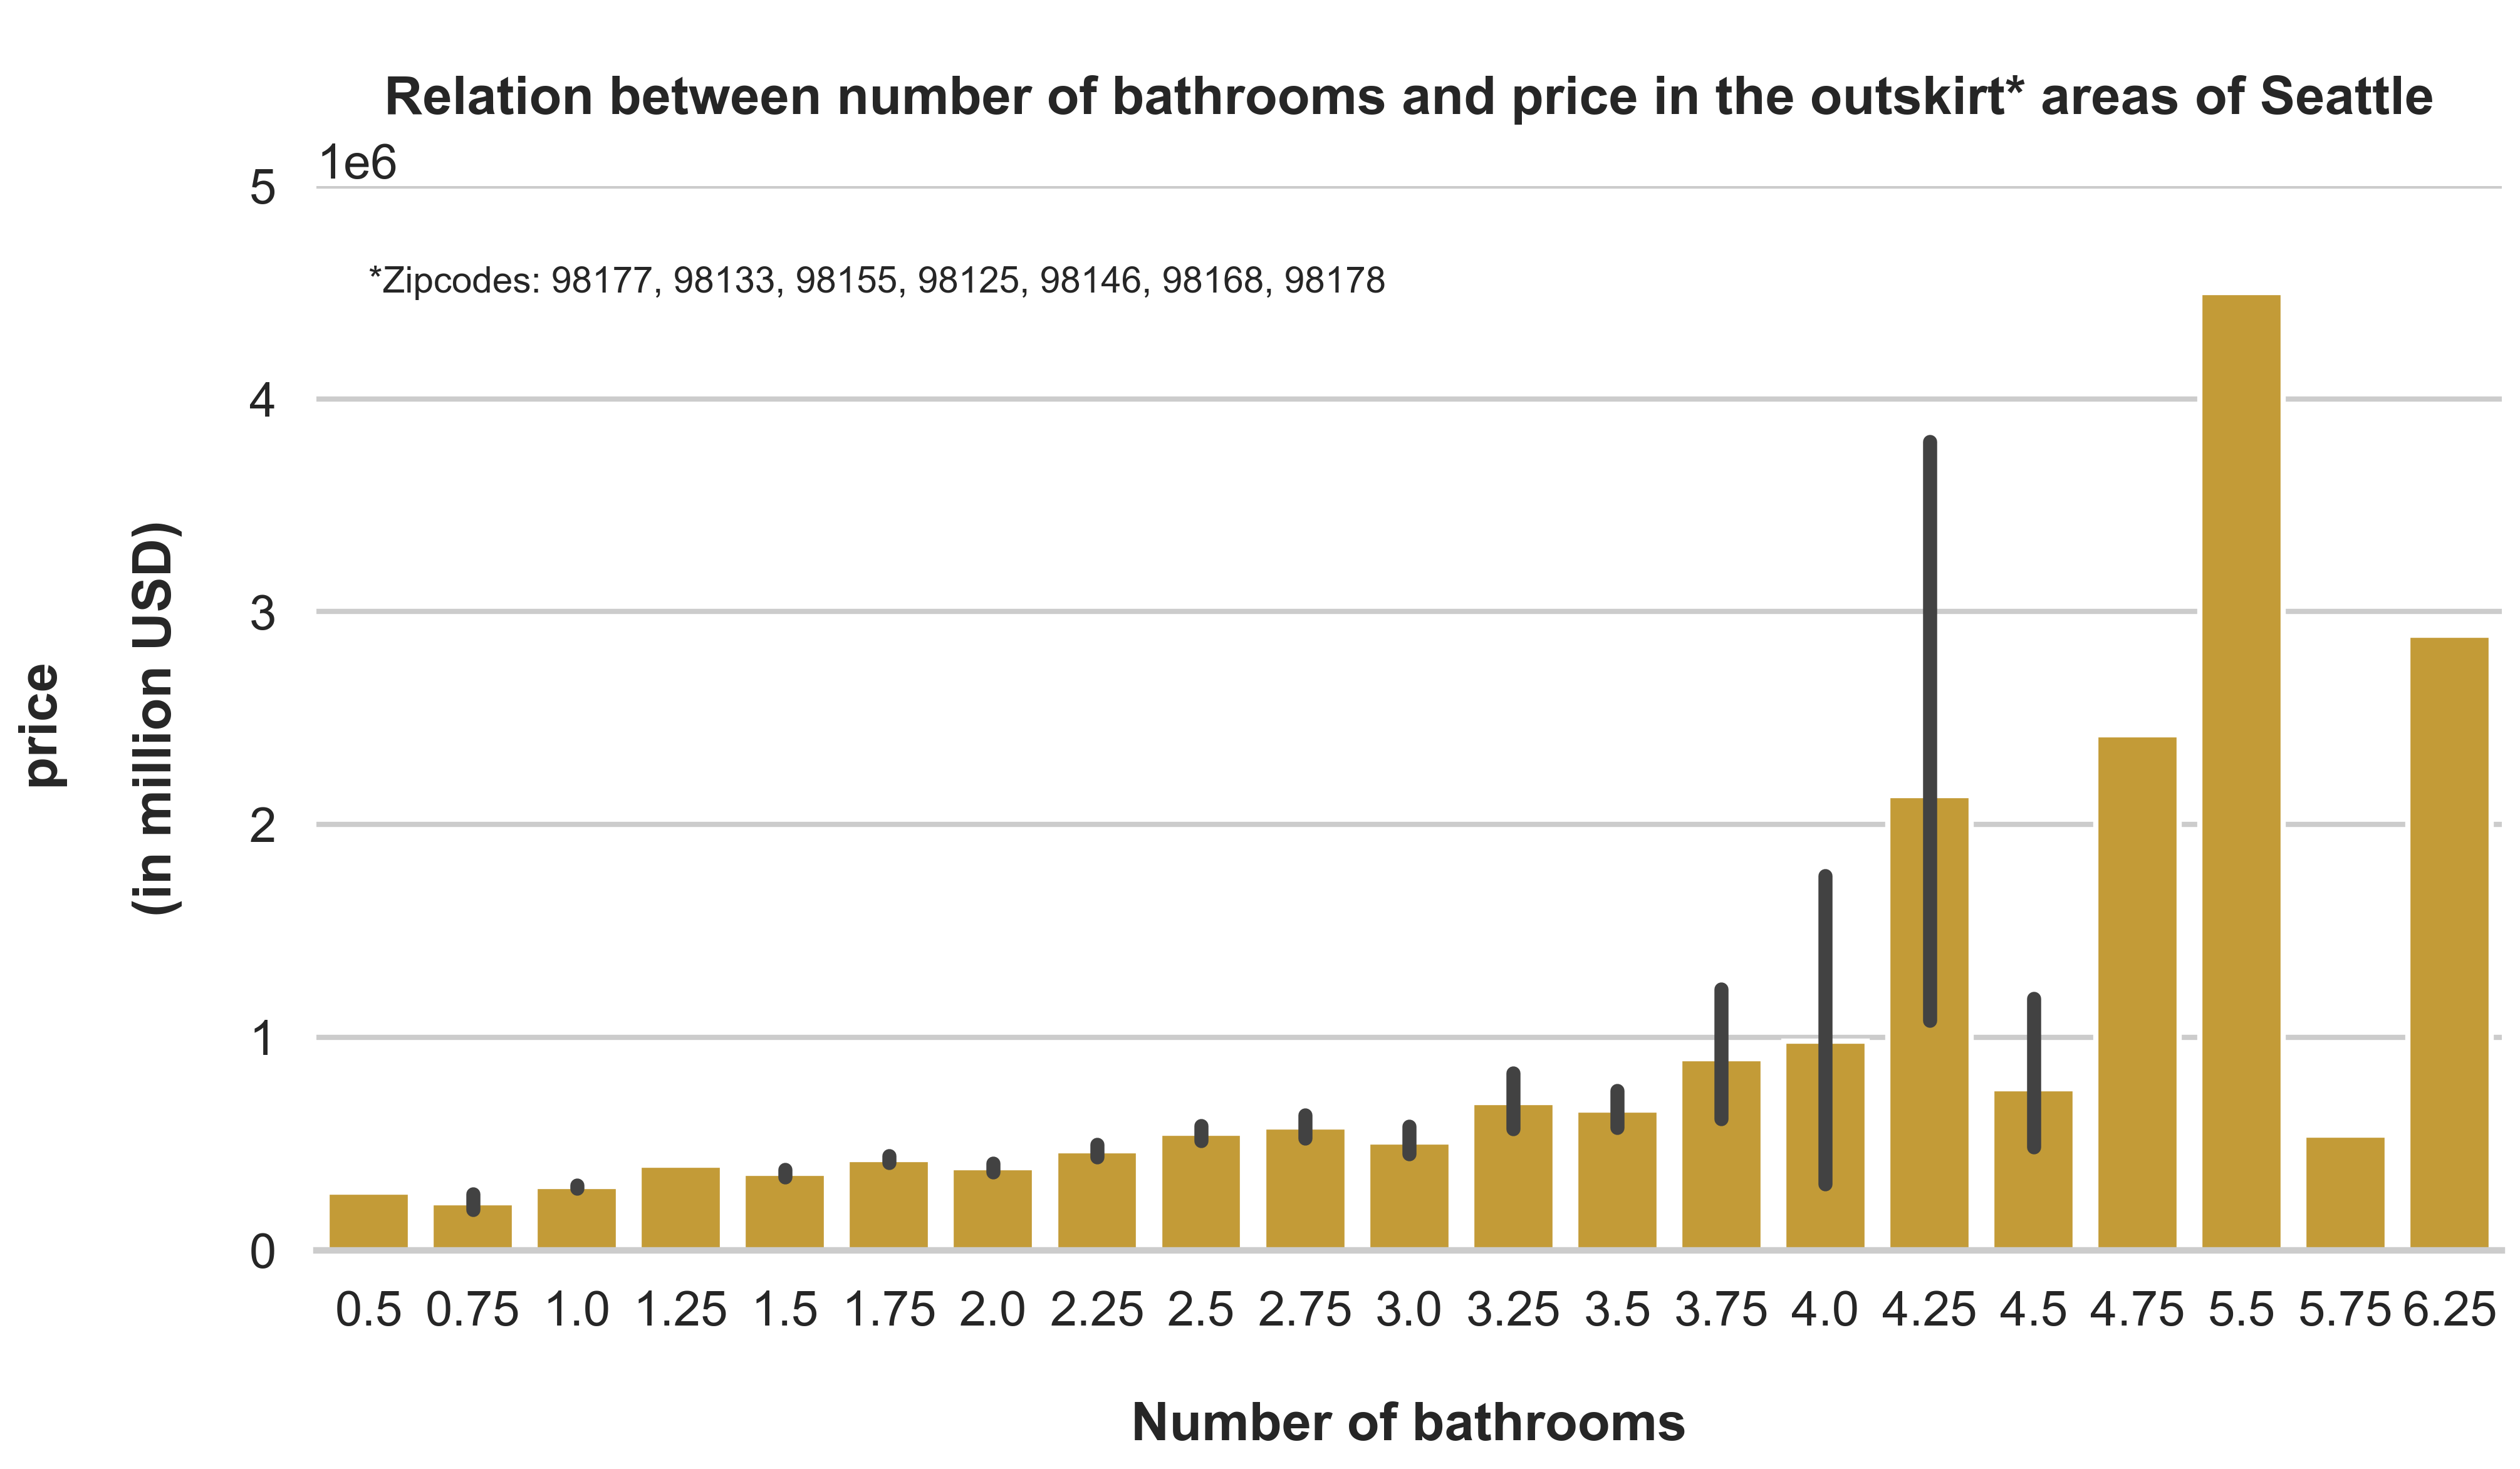

In [113]:
plot = sns.barplot(x=df_outskirts_estates['bathrooms'], y=df_outskirts_estates['price'], color='#daa520')
Plot = sns.despine(left=True)

plot.set_xlabel('\nNumber of bathrooms', weight='semibold')

plot.set_ylabel('price \n \n(in million USD)\n', weight='semibold')
plot.set_ylim(0,5e6)

plot.set_title('\nRelation between number of bathrooms and price in the outskirt* areas of Seattle\n', weight='semibold')

plot.annotate('*Zipcodes: 98177, 98133, 98155, 98125, 98146, 98168, 98178', xy=(0,4.5e6), fontsize=14)

In [241]:
mean_value_max_4_baths = df_outskirts_estates[['price', 'bathrooms']].query('bathrooms <= 4.0').mean().reset_index()
mean_value_max_4_baths

index          0
0      price 408987.112
1  bathrooms      1.762

In [242]:
mean_value_3_4_beds = df_outskirts_estates[['price', 'bedrooms']].query('3 <= bedrooms >= 4').mean().reset_index()
mean_value_3_4_beds

index          0
0     price 498174.735
1  bedrooms      4.309

Text(0, 900000.0, '*Zipcodes: 98177, 98133, 98155, 98125, 98146, 98168, 98178')

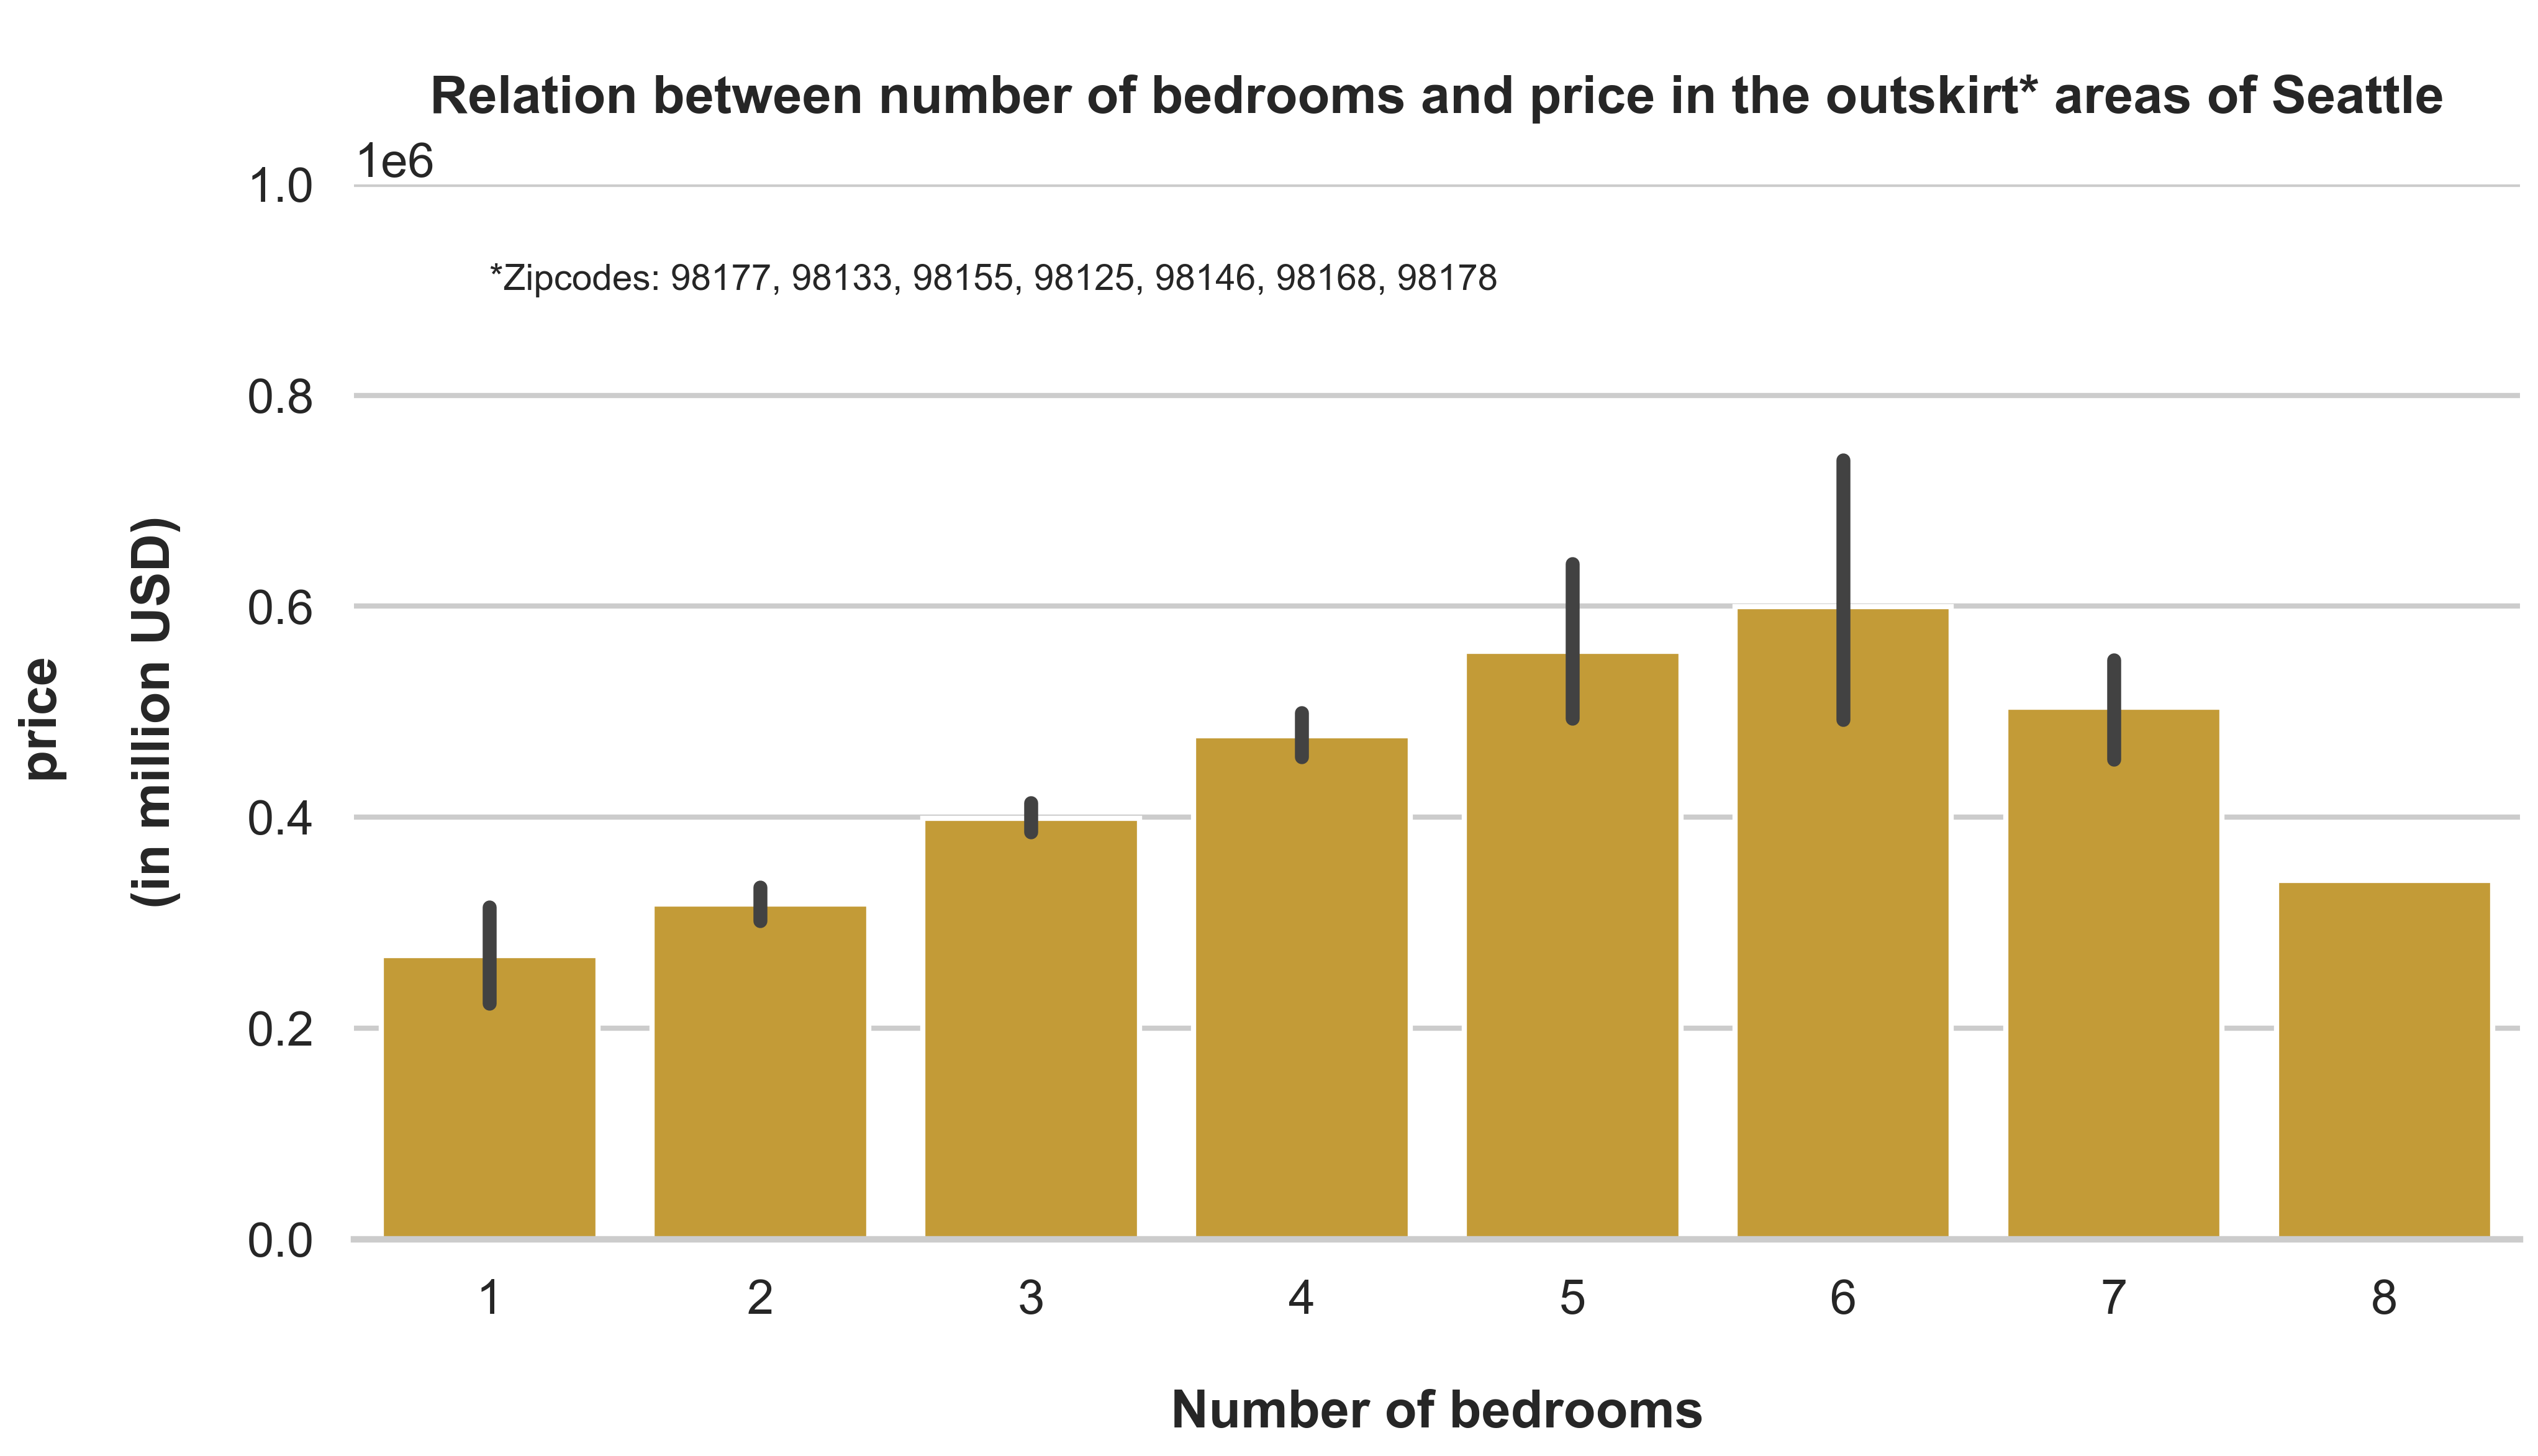

In [114]:
plot = sns.barplot(x=df_outskirts_estates['bedrooms'], y=df_outskirts_estates['price'], color='#daa520')
Plot = sns.despine(left=True)

plot.set_xlabel('\nNumber of bedrooms', weight='semibold')

plot.set_ylabel('price \n \n(in million USD)\n', weight='semibold')
plot.set_ylim(0,1e6)

plot.set_title('\nRelation between number of bedrooms and price in the outskirt* areas of Seattle\n', weight='semibold')

plot.annotate('*Zipcodes: 98177, 98133, 98155, 98125, 98146, 98168, 98178', xy=(0,0.9e6), fontsize=14)

In [ ]:
plt.rcParams['figure.figsize']=(15,7.5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='whitegrid')
sns.set_context('poster', font_scale=0.85)

In [140]:
df_outskirts_estates_month_yr = df[['year', 'month', 'price', 'zipcode']].query('zipcode == @outskirts_seattle').sort_values('price', ascending=False).reset_index()

df_outskirts_estates_month_yr2014 = df_central_estates_month_yr[['year', 'month', 'price', 'zipcode']].query('year == 2014').sort_values('price', ascending=False).reset_index()

In [244]:
df_outskirts_estates_month_yr_count2014 = df_outskirts_estates_month_yr2014['month'].value_counts().reset_index()
df_outskirts_estates_month_yr_count2014.columns = ['month', 'count']
df_outskirts_estates_month_yr_count2014

month  count
0      7     76
1      6     74
2      9     63
3     10     61
4      5     59
5     11     53
6     12     50
7      8     43

Text(7, 2, '50')

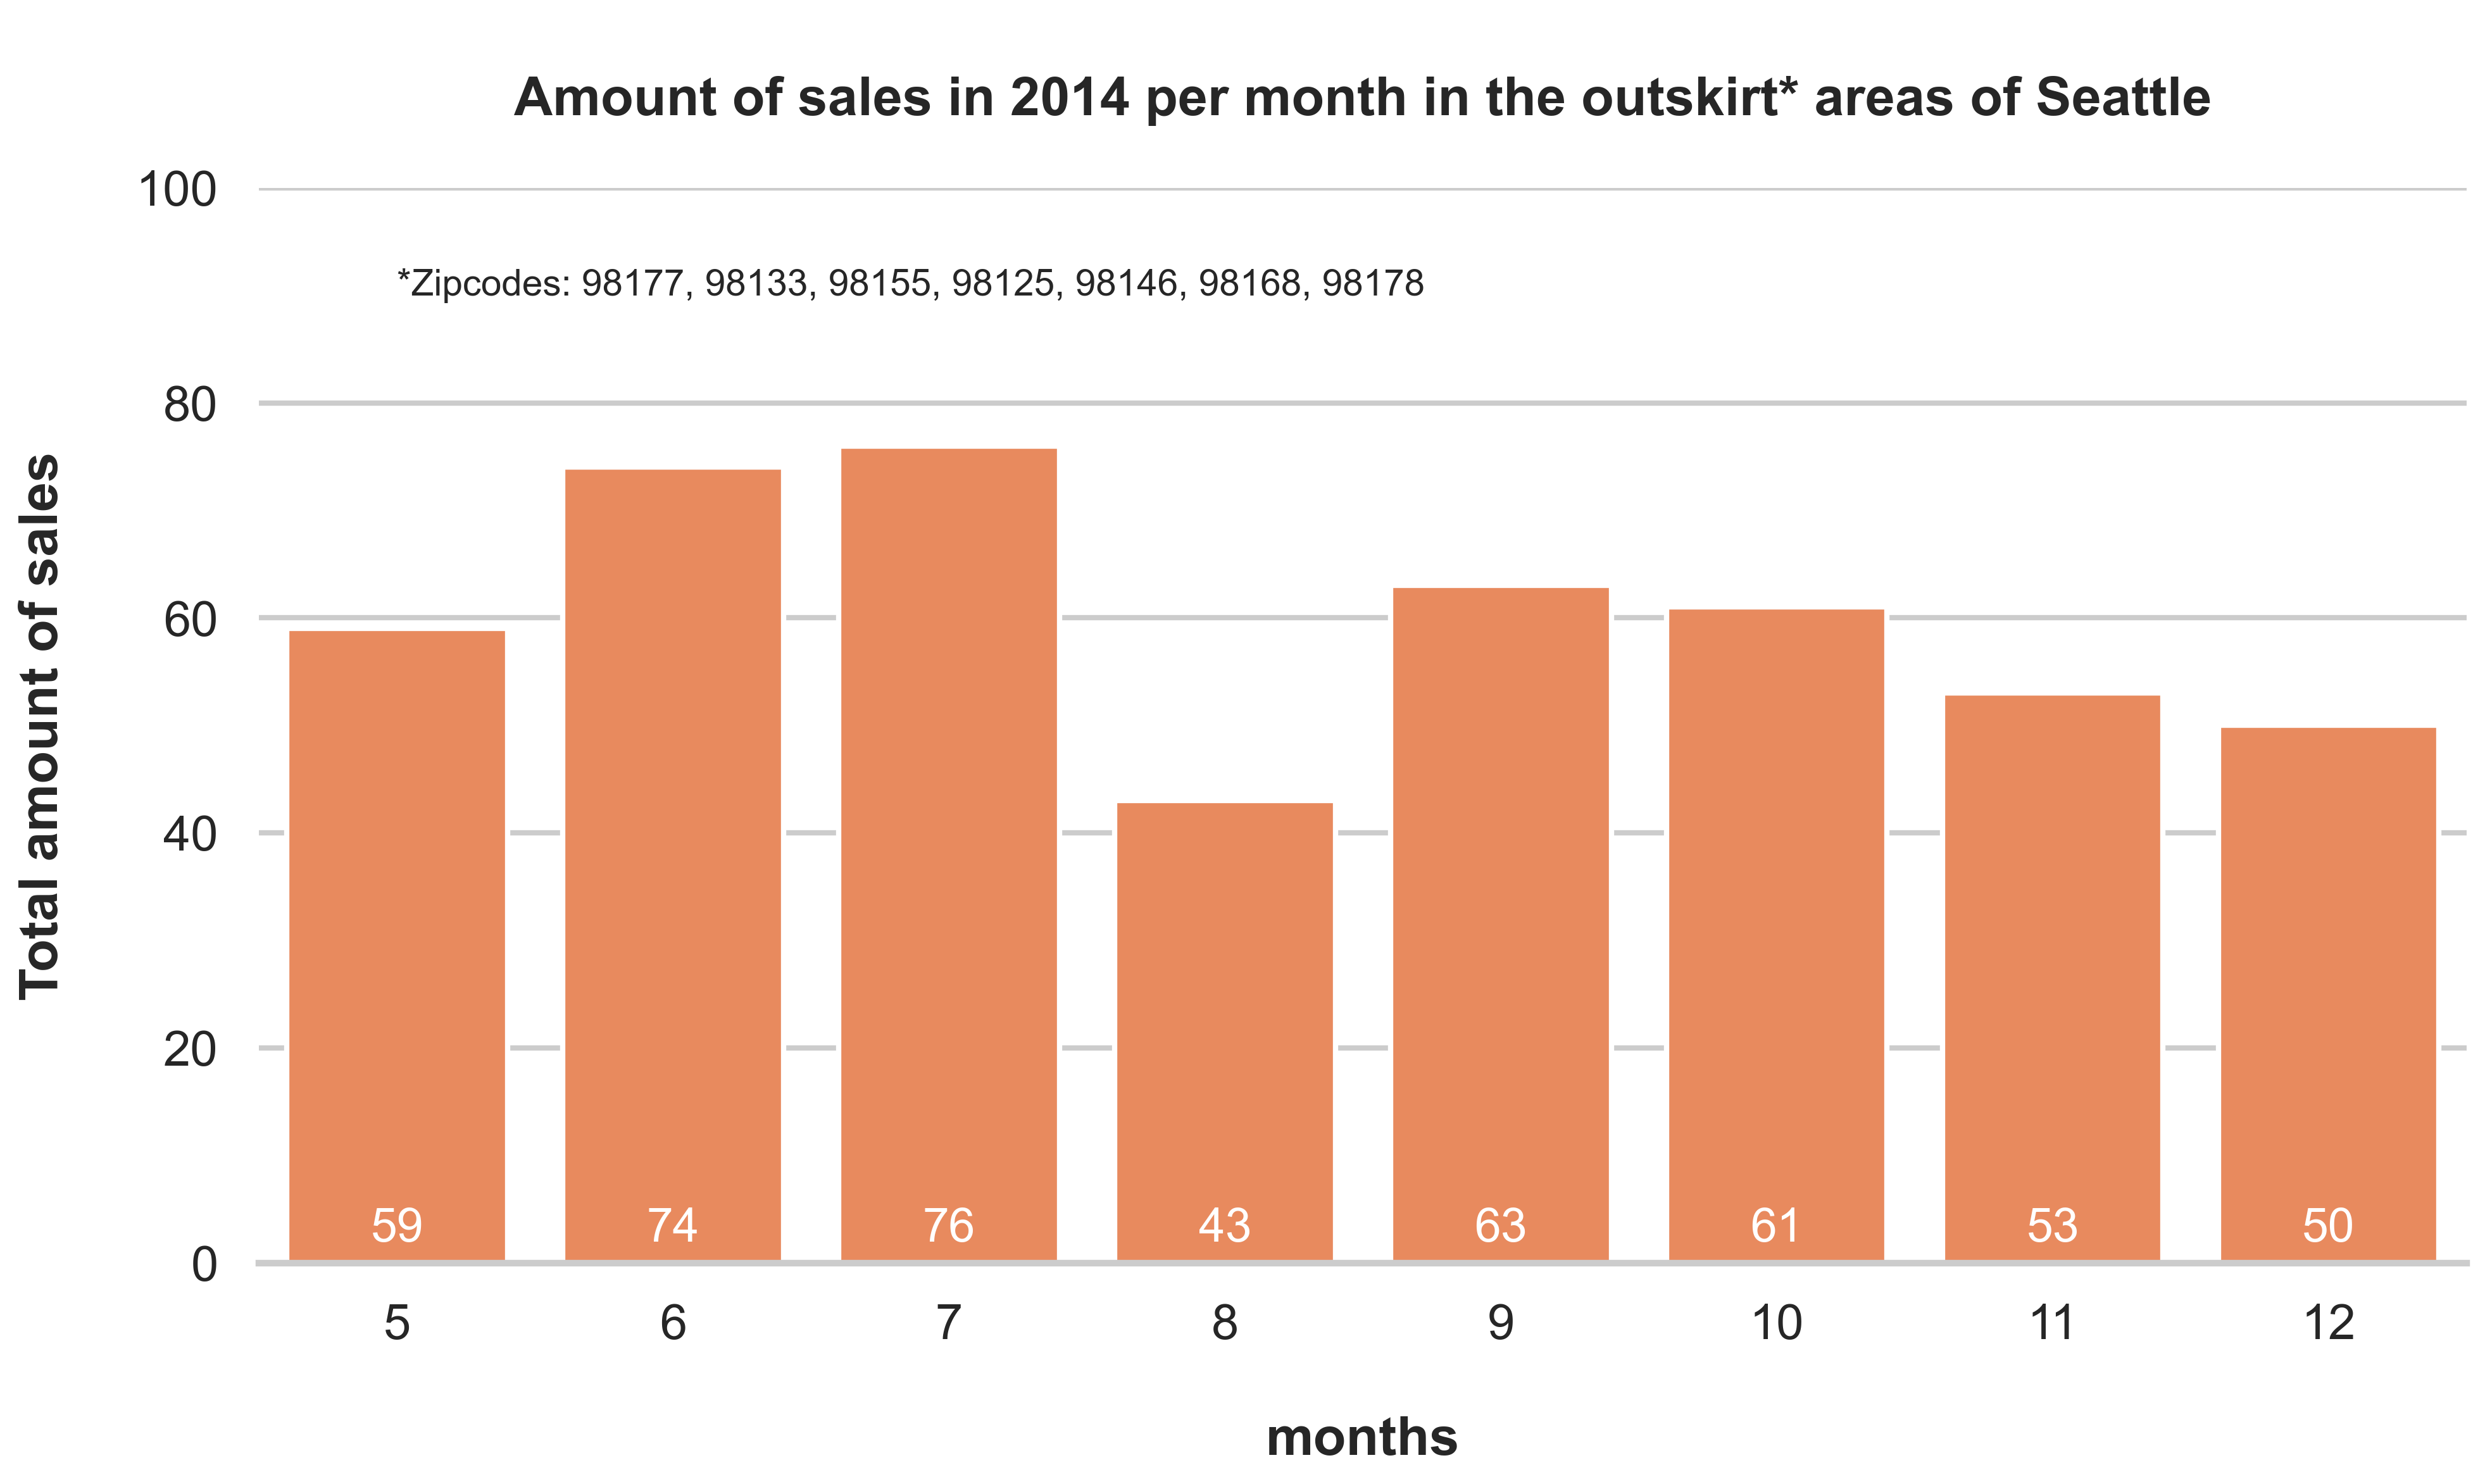

In [166]:
plot = sns.barplot(x=df_outskirts_estates_month_yr_count2014['month'], y=df_outskirts_estates_month_yr_count2014['count'], color='#ff8247')
Plot = sns.despine(left=True)

plot.set_xlabel('\nmonths', weight='semibold')

plot.set_ylabel('Total amount of sales\n', weight='semibold')
plot.set_ylim(0,100)

plot.set_title('\nAmount of sales in 2014 per month in the outskirt* areas of Seattle\n', weight='semibold')

plot.annotate('*Zipcodes: 98177, 98133, 98155, 98125, 98146, 98168, 98178', xy=(0,90), fontsize=14)
plot.text(x=0, y=2, s=59, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=1, y=2, s=74, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=2, y=2, s=76, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=3, y=2, s=43, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=4, y=2, s=63, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=5, y=2, s=61, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=6, y=2, s=53, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=7, y=2, s=50, color='white', fontsize=18, horizontalalignment='center')

In [154]:
df_outskirts_estates_month_yr = df[['year', 'month', 'price', 'zipcode']].query('zipcode == @outskirts_seattle').sort_values('price', ascending=False).reset_index()

df_outskirts_estates_month_yr2015 = df_central_estates_month_yr[['year', 'month', 'price', 'zipcode']].query('year == 2015').sort_values('price', ascending=False).reset_index()

In [245]:
df_outskirts_estates_month_yr_count2015 = df_outskirts_estates_month_yr2015['month'].value_counts().reset_index()
df_outskirts_estates_month_yr_count2015.columns = ['month', 'count']
df_outskirts_estates_month_yr_count2015

month    3.000
count   36.800
dtype: float64

Text(4, 2, '16')

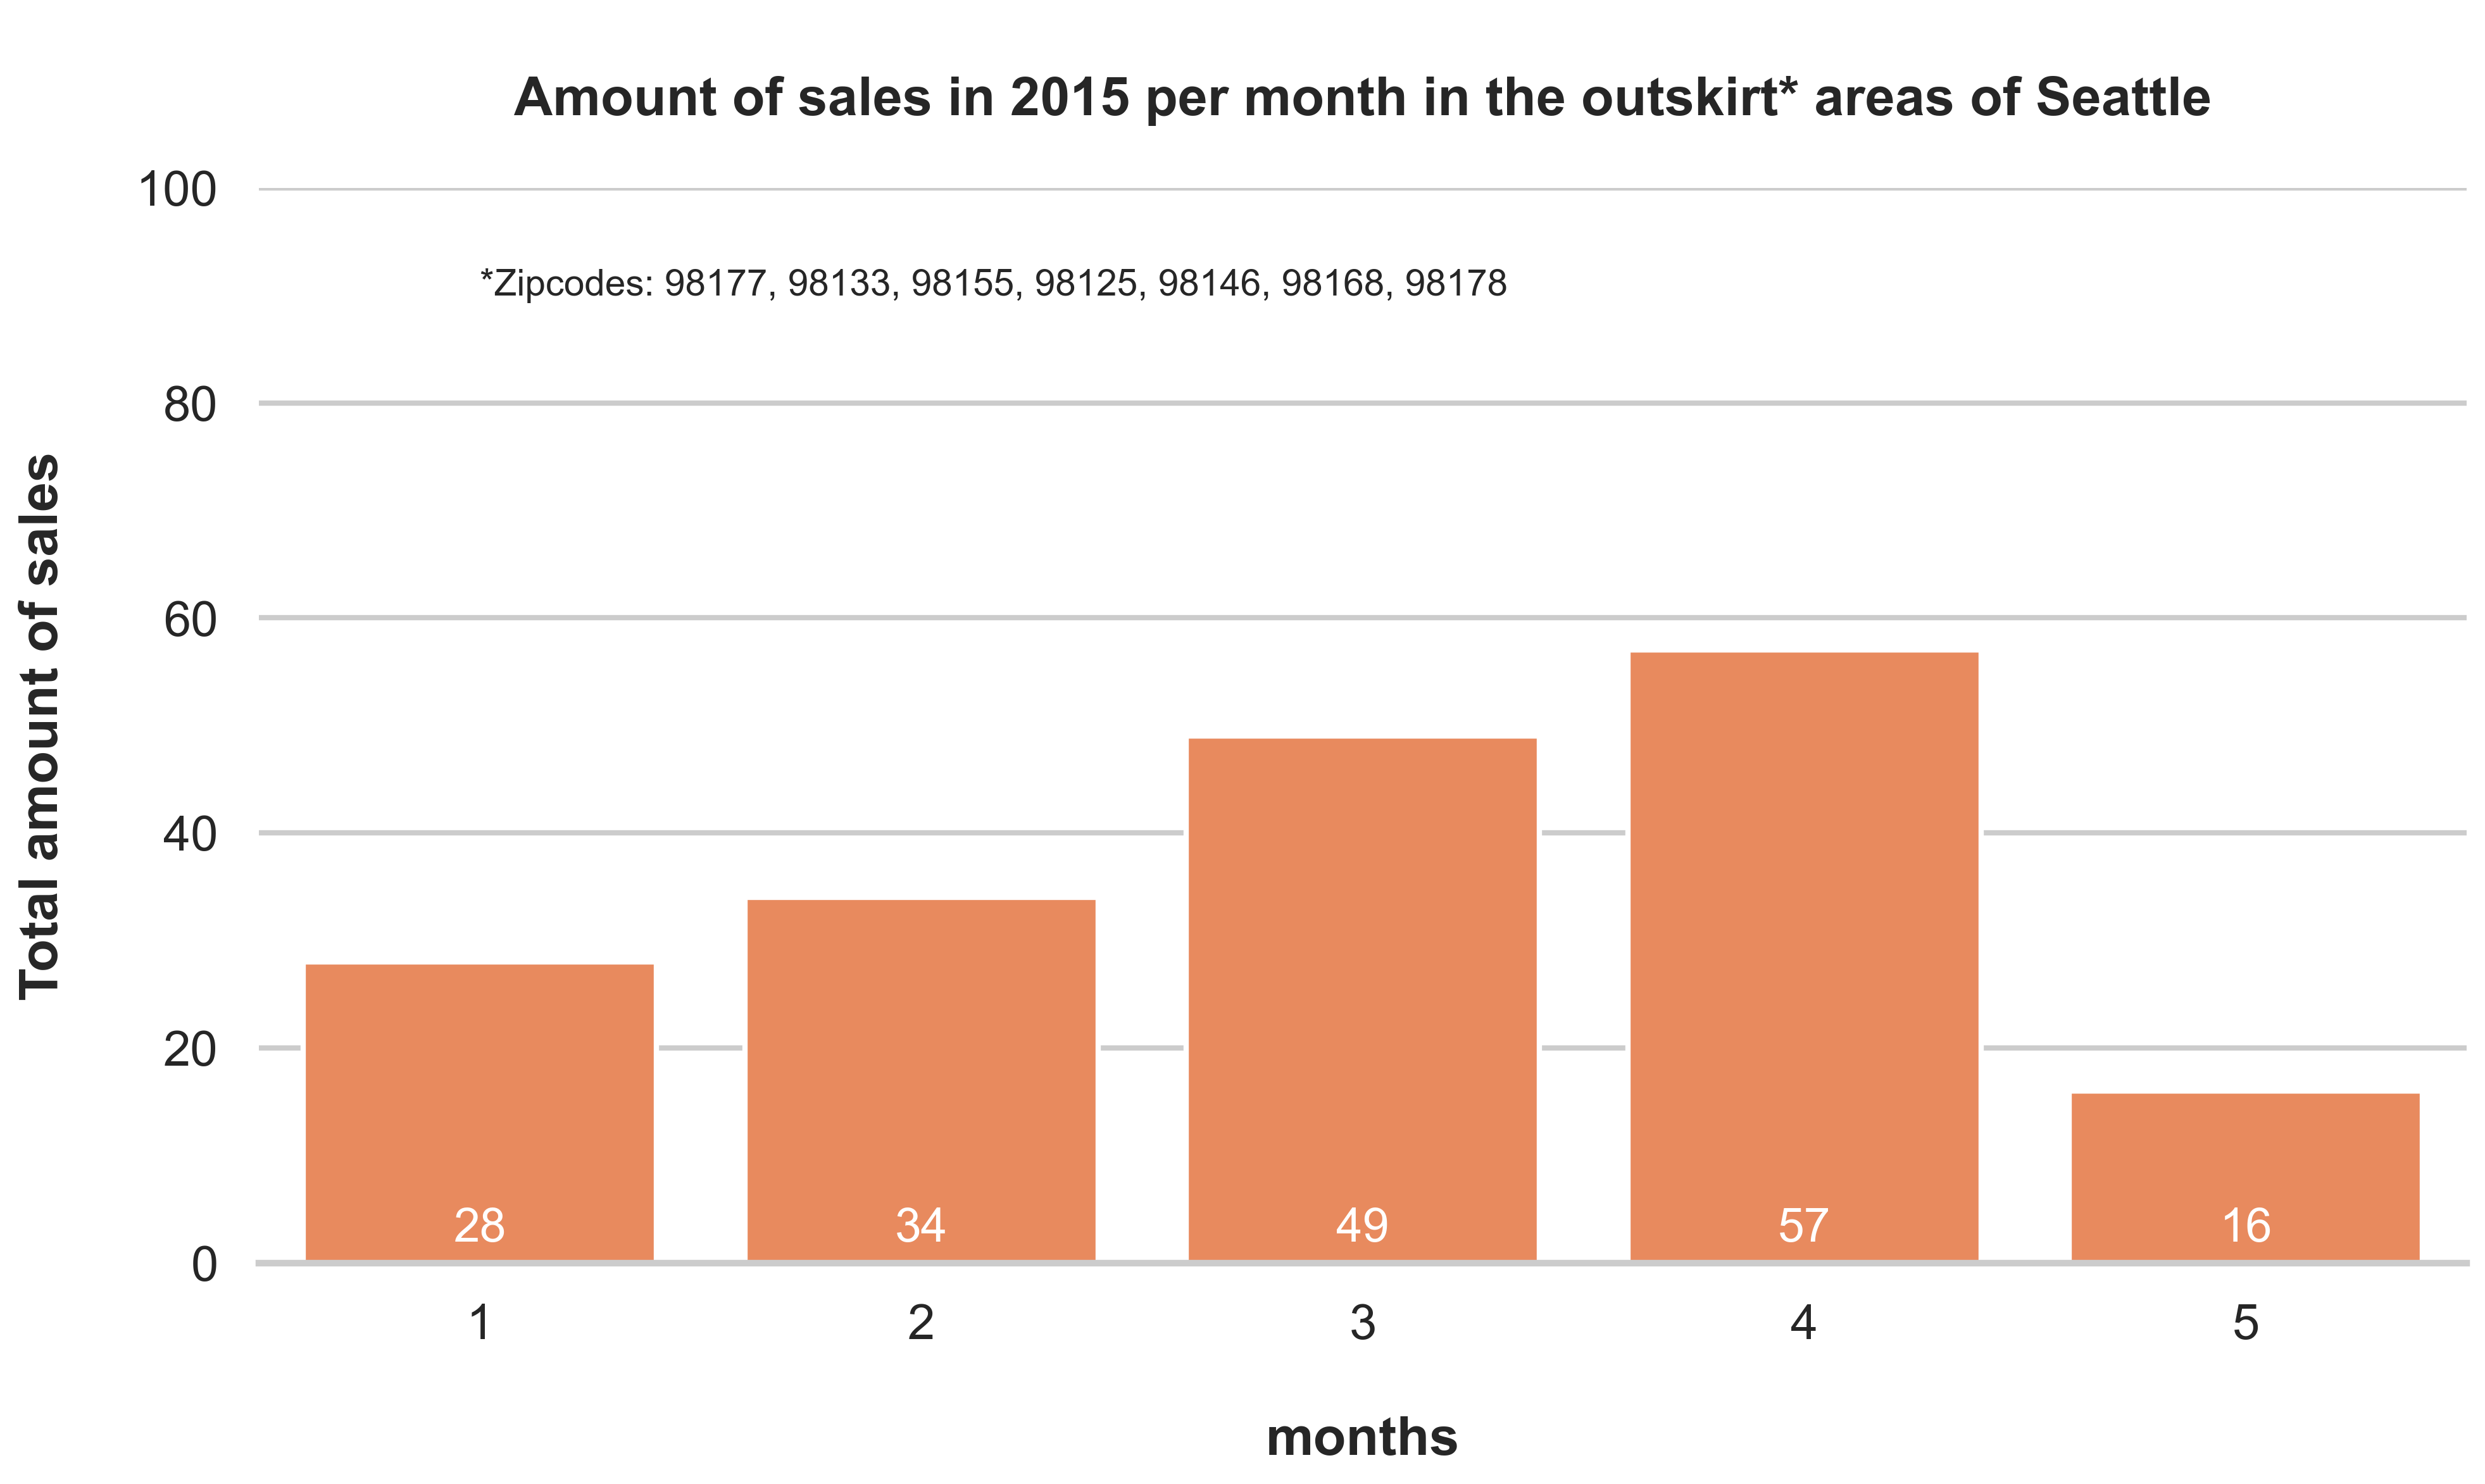

In [167]:
plot = sns.barplot(x=df_outskirts_estates_month_yr_count2015['month'], y=df_outskirts_estates_month_yr_count2015['count'], color='#ff8247')
Plot = sns.despine(left=True)

plot.set_xlabel('\nmonths', weight='semibold')

plot.set_ylabel('Total amount of sales\n', weight='semibold')
plot.set_ylim(0,100)

plot.set_title('\nAmount of sales in 2015 per month in the outskirt* areas of Seattle\n', weight='semibold')

plot.annotate('*Zipcodes: 98177, 98133, 98155, 98125, 98146, 98168, 98178', xy=(0,90), fontsize=14)
plot.text(x=0, y=2, s=28, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=1, y=2, s=34, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=2, y=2, s=49, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=3, y=2, s=57, color='white', fontsize=18, horizontalalignment='center')
plot.text(x=4, y=2, s=16, color='white', fontsize=18, horizontalalignment='center')